In [1]:
# Import required libraries
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np

## PART - 1 : Defining RL World : Search & Rescue Env

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class SearchRescueEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        self.grid_size = 4  # Define the grid size
        self.observation_space = spaces.Discrete(self.grid_size * self.grid_size)  # 4x4 grid
        self.action_space = spaces.Discrete(4)  # Actions: up, down, left, right

        # Starting and goal positions
        self.basecamp_pos = [0, 0]
        self.goal_pos = [3, 3]

        # Initialize the agent position and the timestep counter
        self.agent_pos = [0, 0]
        self.timestep = 0

        # State representation and visited matrix
        self.state = np.zeros((self.grid_size, self.grid_size), dtype=int)
        self.visited = np.zeros_like(self.state, dtype=bool)
        
        # Update the initial state
        self.update_state()

    def reset(self):
        self.agent_pos = [0, 0]
        self.timestep = 0
        self.visited.fill(False)  # Reset the visited matrix
        self.goal_pos = [3, 3]
        self.update_state()
        return self.state.flatten()

    def step(self, action):
        # Save the old agent position for distance calculation
        old_pos = self.agent_pos.copy()

        # Execute action
        if action == 0:  # up
            self.agent_pos[0] = max(0, self.agent_pos[0] - 1)
        elif action == 1:  # down
            self.agent_pos[0] = min(self.grid_size - 1, self.agent_pos[0] + 1)
        elif action == 2:  # right
            self.agent_pos[1] = min(self.grid_size - 1, self.agent_pos[1] + 1)
        elif action == 3:  # left
            self.agent_pos[1] = max(0, self.agent_pos[1] - 1)

        # Update the environment state
        self.update_state()
        observation = self.state.flatten()

        # Calculate the reward
        reward = -1  # Step penalty

        # Closer to Goal Reward
        old_distance = np.linalg.norm(np.array(self.goal_pos) - np.array(old_pos))
        new_distance = np.linalg.norm(np.array(self.goal_pos) - np.array(self.agent_pos))
        if new_distance < old_distance:
            reward += 1  # Positive reward for getting closer to the goal

        # Discovery Reward
        if not self.visited[tuple(self.agent_pos)]:
            reward += 1  # Reward for visiting a new cell
            self.visited[tuple(self.agent_pos)] = True  # Mark this cell as visited

        # Update timestep and check for termination
        self.timestep += 1
        done = self.agent_pos == self.goal_pos
        
        # Success Reward
        if done:
            reward += 10  # Large reward for finding the goal

        # Check if the timestep is at least 10 and if the goal is reached
#         if self.timestep >= 10:
#             done = self.agent_pos == self.goal_pos

        
        info = {}

        return observation, reward, done, info

    def render(self, mode='human'):
        fig, ax = plt.subplots()
        ax.imshow(self.state, cmap='hot', interpolation='nearest')
        for (j, i), label in np.ndenumerate(self.state):
            if label == 1:
                ax.text(i, j, 'A', ha='center', va='center', color='green')  # Agent
            elif label == 2:
                ax.text(i, j, 'G', ha='center', va='center', color='blue')  # Goal
        plt.title('Search and Rescue Operation Grid')
        plt.axis('off')
        plt.show()

    def update_state(self):
        self.state = np.zeros((self.grid_size, self.grid_size), dtype=int)
        self.state[tuple(self.agent_pos)] = 1  # Mark the agent's position with 1
        self.state[tuple(self.goal_pos)] = 2  # Mark the goal's position with 2

# To create an instance of the environment
env = SearchRescueEnv()


## Running the World for atleast 10 steps

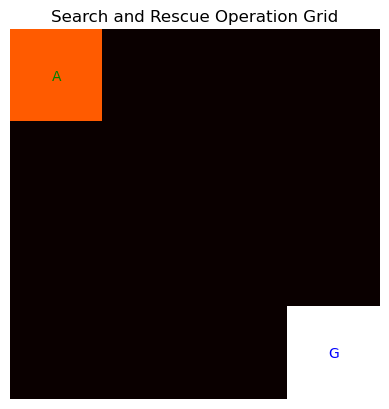

Episode: 1, Step: 1, Action: 1, Reward: 1, Total Reward: 1


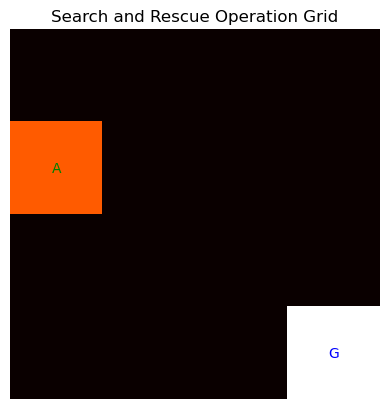

Episode: 1, Step: 2, Action: 0, Reward: 0, Total Reward: 1


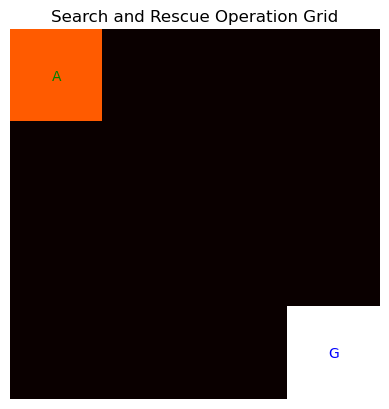

Episode: 1, Step: 3, Action: 2, Reward: 1, Total Reward: 2


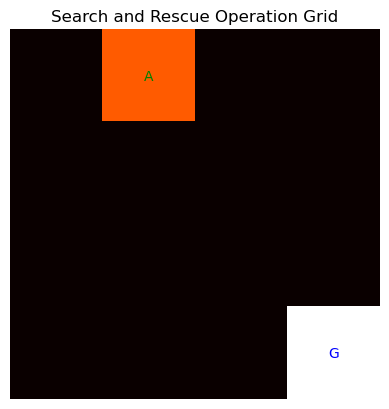

Episode: 1, Step: 4, Action: 0, Reward: -1, Total Reward: 1


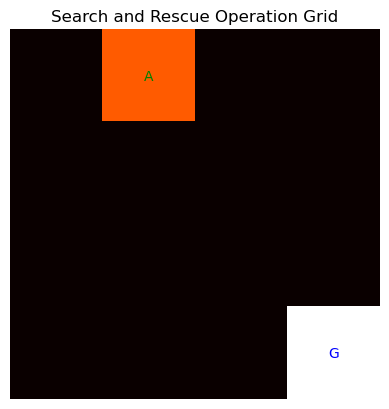

Episode: 1, Step: 5, Action: 3, Reward: -1, Total Reward: 0


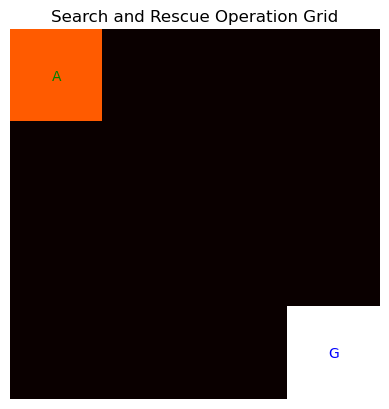

Episode: 1, Step: 6, Action: 2, Reward: 0, Total Reward: 0


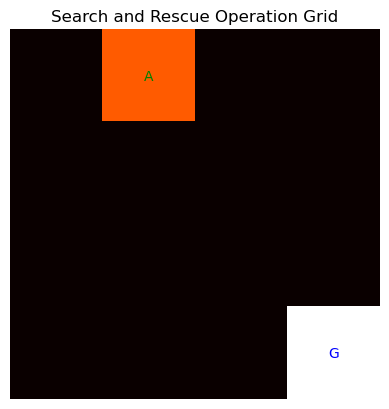

Episode: 1, Step: 7, Action: 0, Reward: -1, Total Reward: -1


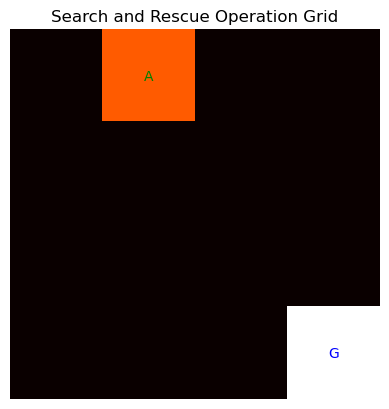

Episode: 1, Step: 8, Action: 3, Reward: -1, Total Reward: -2


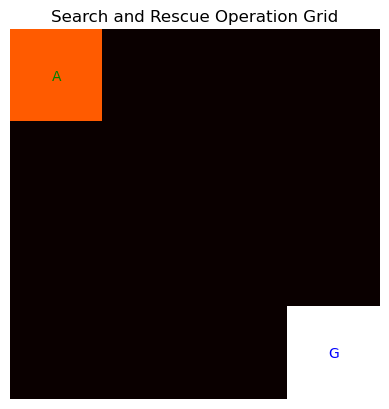

Episode: 1, Step: 9, Action: 2, Reward: 0, Total Reward: -2


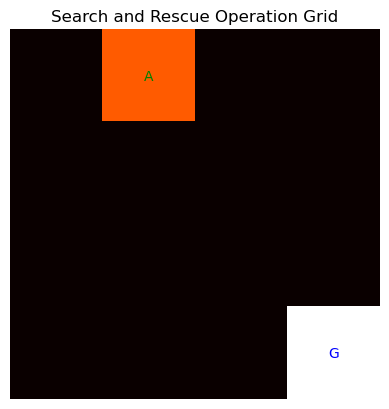

Episode: 1, Step: 10, Action: 3, Reward: -1, Total Reward: -3


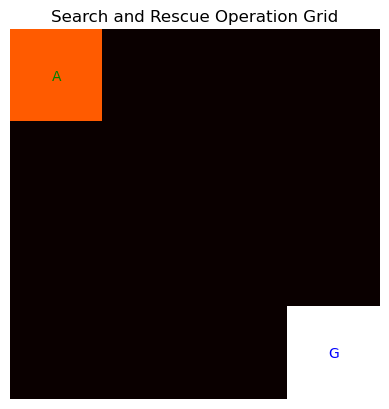

Episode: 1, Step: 11, Action: 3, Reward: -1, Total Reward: -4


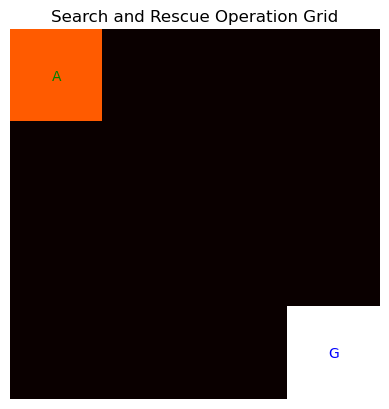

Episode: 1, Step: 12, Action: 1, Reward: 0, Total Reward: -4


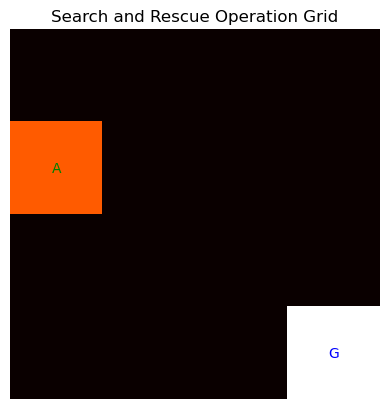

Episode: 1, Step: 13, Action: 2, Reward: 1, Total Reward: -3


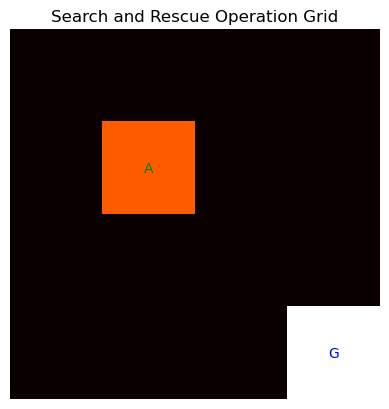

Episode: 1, Step: 14, Action: 1, Reward: 1, Total Reward: -2


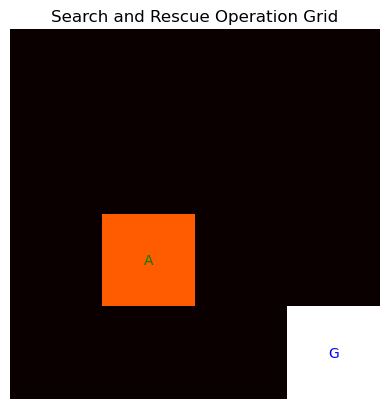

Episode: 1, Step: 15, Action: 0, Reward: -1, Total Reward: -3


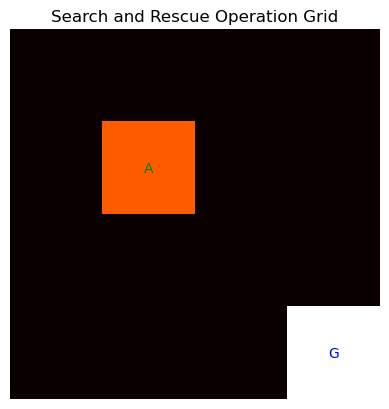

Episode: 1, Step: 16, Action: 1, Reward: 0, Total Reward: -3


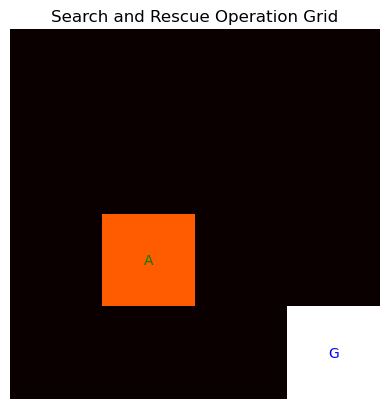

Episode: 1, Step: 17, Action: 2, Reward: 1, Total Reward: -2


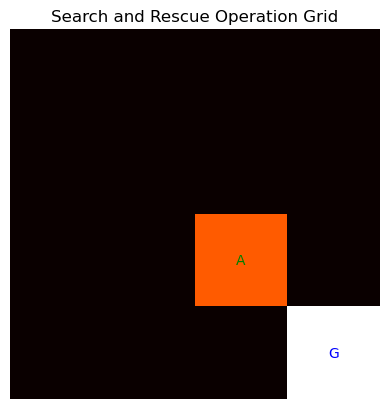

Episode: 1, Step: 18, Action: 0, Reward: 0, Total Reward: -2


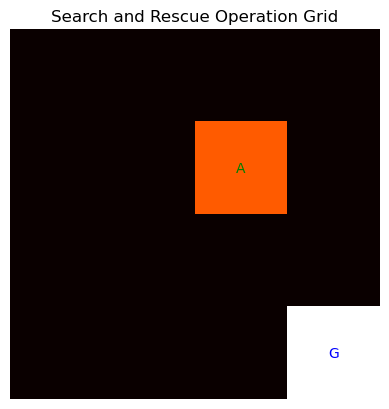

Episode: 1, Step: 19, Action: 2, Reward: 1, Total Reward: -1


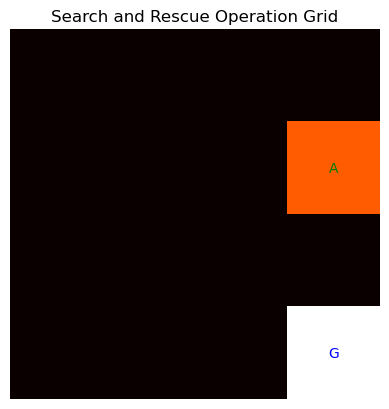

Episode: 1, Step: 20, Action: 0, Reward: 0, Total Reward: -1


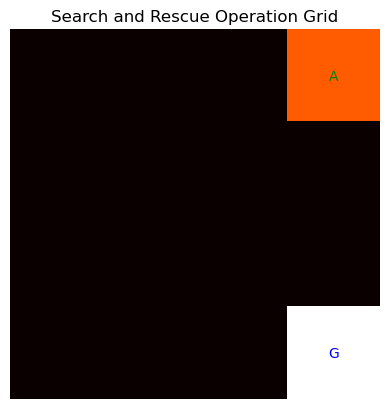

Episode: 1, Step: 21, Action: 3, Reward: 0, Total Reward: -1


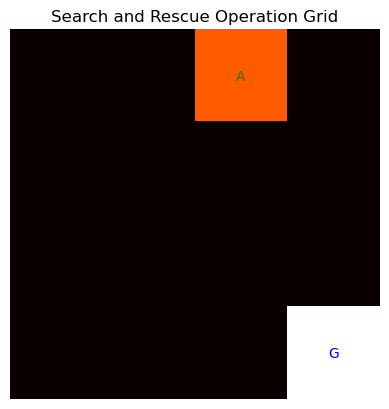

Episode: 1, Step: 22, Action: 1, Reward: 0, Total Reward: -1


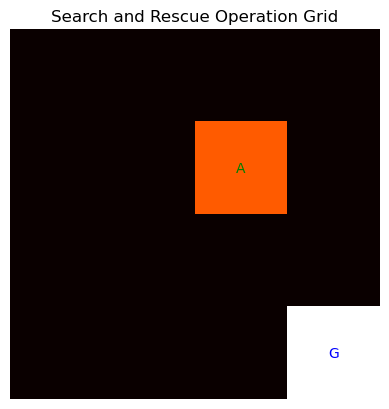

Episode: 1, Step: 23, Action: 2, Reward: 0, Total Reward: -1


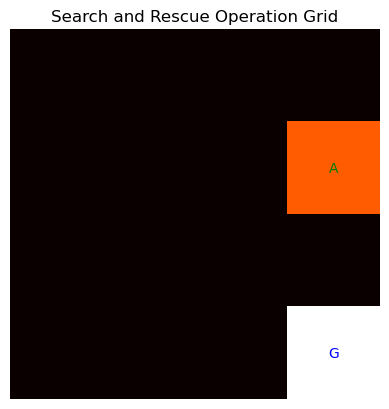

Episode: 1, Step: 24, Action: 3, Reward: -1, Total Reward: -2


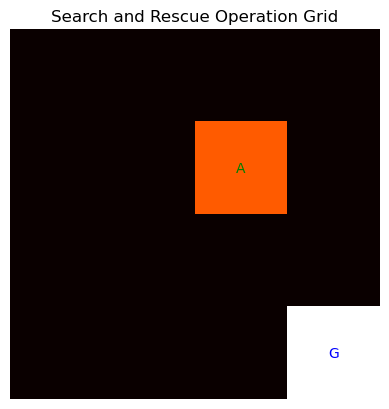

Episode: 1, Step: 25, Action: 2, Reward: 0, Total Reward: -2


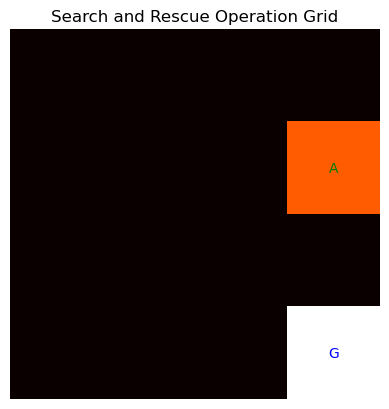

Episode: 1, Step: 26, Action: 1, Reward: 1, Total Reward: -1


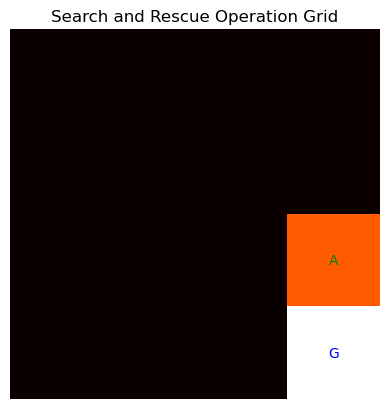

Episode: 1, Step: 27, Action: 3, Reward: -1, Total Reward: -2


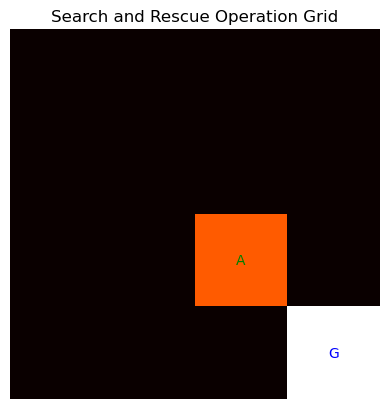

Episode: 1, Step: 28, Action: 3, Reward: -1, Total Reward: -3


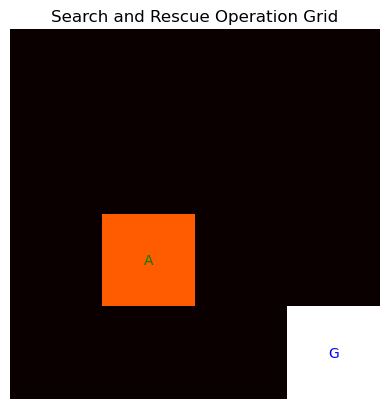

Episode: 1, Step: 29, Action: 0, Reward: -1, Total Reward: -4


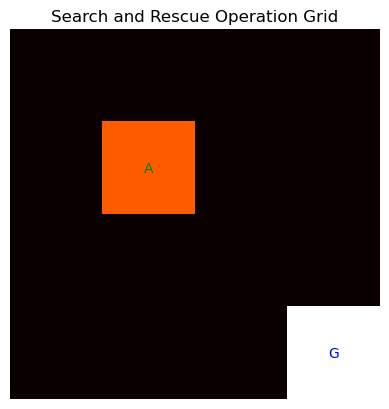

Episode: 1, Step: 30, Action: 1, Reward: 0, Total Reward: -4


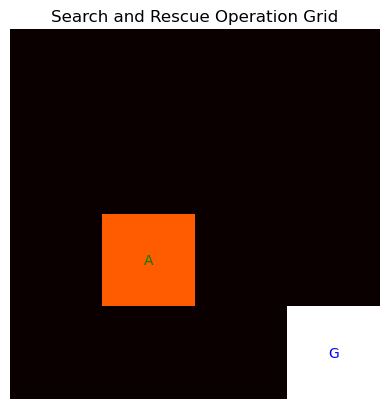

Episode: 1, Step: 31, Action: 0, Reward: -1, Total Reward: -5


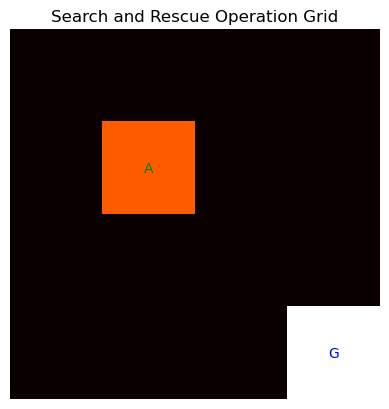

Episode: 1, Step: 32, Action: 1, Reward: 0, Total Reward: -5


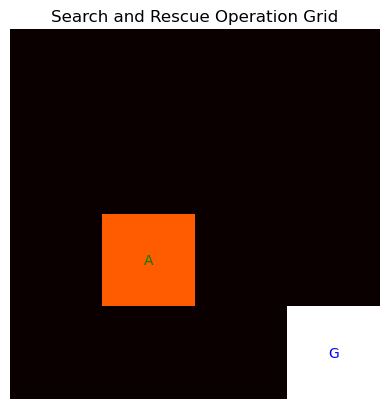

Episode: 1, Step: 33, Action: 2, Reward: 0, Total Reward: -5


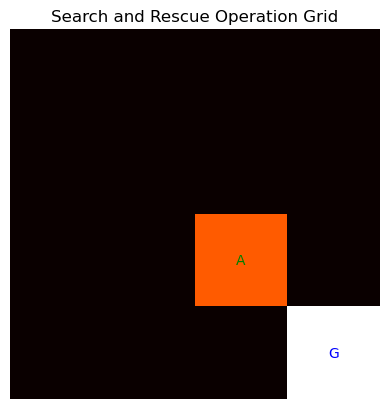

Episode: 1, Step: 34, Action: 2, Reward: 0, Total Reward: -5


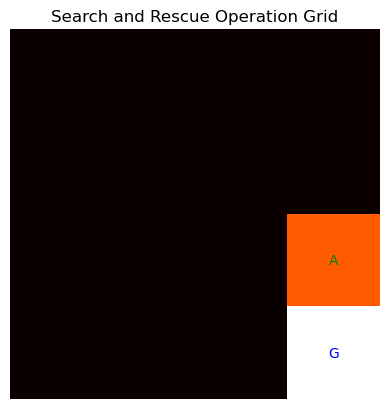

Episode: 1, Step: 35, Action: 1, Reward: 11, Total Reward: 6
Episode ended: Goal successfully reached!
Episode finished after 35 timesteps with total reward 6



In [3]:
# Run a random agent for a specified number of episodes
num_episodes = 1
for episode in range(num_episodes):
    observation = env.reset()
    done = False
    total_reward = 0

    while not done:
        env.render()  # Visualize the environment
        action = env.action_space.sample()  # Choose a random action
        observation, reward, done, info = env.step(action)  # Take the action
        total_reward += reward
        print(f"Episode: {episode+1}, Step: {env.timestep}, Action: {action}, Reward: {reward}, Total Reward: {total_reward}")

        if done:
            if env.agent_pos == env.goal_pos:
                print("Episode ended: Goal successfully reached!")
            else:
                print("Episode ended: Goal not reached.")
            print(f"Episode finished after {env.timestep} timesteps with total reward {total_reward}\n")
            break

env.close()  

## Implementing SARSA Algorithm

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


class SARSAAgent:
    def __init__(self, alpha, gamma, epsilon, epsilon_decay, min_epsilon, action_space, state_space):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.action_space = action_space
        self.state_space = state_space
        self.q_table = defaultdict(lambda: np.zeros(action_space.n))
        self.epsilon_history = []
    
    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.action_space.n)
        else:
            q_vals = self.q_table[state]
            action = np.argmax(q_vals)
            return action
    
    def update(self, state, action, reward, next_state, next_action):
        temporal_target = reward + self.gamma * self.q_table[next_state][next_action]
        temporal_difference = temporal_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * temporal_difference
    
    #  train method
    def train(self, env, num_episodes, max_steps):
        rewards = []
        for episode in range(num_episodes):
            current_state = env.reset()
            state = tuple(current_state)  
            action = self.choose_action(state)
            total_reward = 0
            done = False
            for step in range(max_steps):
                next_state_array, reward, done, _ = env.step(action)
                next_state = tuple(next_state_array)  
                next_action = self.choose_action(next_state)
                self.update(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
                total_reward += reward
                if done:
                    break
            rewards.append(total_reward)
            self.epsilon = max(self.epsilon * self.epsilon_decay, self.min_epsilon)
            print(f"Episode: {episode+1}, Total Reward: {total_reward}")
            self.epsilon_history.append(self.epsilon)
        return rewards




## SARSA Parameters && Initialization

In [5]:
# Parameters for SARSA
alpha = 0.1
gamma = 0.9
epsilon = 1.0
epsilon_decay = 0.99
min_epsilon = 0.01
num_episodes = 1000
max_steps = 100

# Initialize the environment and the agent
env = SearchRescueEnv()
action_space = env.action_space
state_space = env.observation_space
agent = SARSAAgent(alpha, gamma, epsilon, epsilon_decay, min_epsilon, action_space, state_space)

## Printing Initial and Final Q tables

In [6]:
def print_q_table(q_table):
    for state, action_values in q_table.items():
        state_str = f"State: {state}"
        action_str = " | ".join([f"Action {i}: {val:.2f}" for i, val in enumerate(action_values)])
        print(state_str, action_str)

# Print the initial Q-table
# Print the initial Q-table
print("Initial Q-table:")
print(f"Number of states in Q-table: {len(agent.q_table)}")

# Train the agent
rewards = agent.train(env, num_episodes, max_steps)

print("Final Q-Table:")
print_q_table(agent.q_table)

Initial Q-table:
Number of states in Q-table: 0
Episode: 1, Total Reward: 13
Episode: 2, Total Reward: -29
Episode: 3, Total Reward: 3
Episode: 4, Total Reward: 8
Episode: 5, Total Reward: -8
Episode: 6, Total Reward: -5
Episode: 7, Total Reward: 10
Episode: 8, Total Reward: 5
Episode: 9, Total Reward: -4
Episode: 10, Total Reward: 1
Episode: 11, Total Reward: 16
Episode: 12, Total Reward: 17
Episode: 13, Total Reward: 5
Episode: 14, Total Reward: 9
Episode: 15, Total Reward: -45
Episode: 16, Total Reward: 5
Episode: 17, Total Reward: 10
Episode: 18, Total Reward: 0
Episode: 19, Total Reward: 15
Episode: 20, Total Reward: -2
Episode: 21, Total Reward: 11
Episode: 22, Total Reward: 8
Episode: 23, Total Reward: 9
Episode: 24, Total Reward: 6
Episode: 25, Total Reward: 16
Episode: 26, Total Reward: -5
Episode: 27, Total Reward: 15
Episode: 28, Total Reward: 15
Episode: 29, Total Reward: 9
Episode: 30, Total Reward: 18
Episode: 31, Total Reward: 10
Episode: 32, Total Reward: 6
Episode: 33,

## Epsilon Decay & Reward over episodes

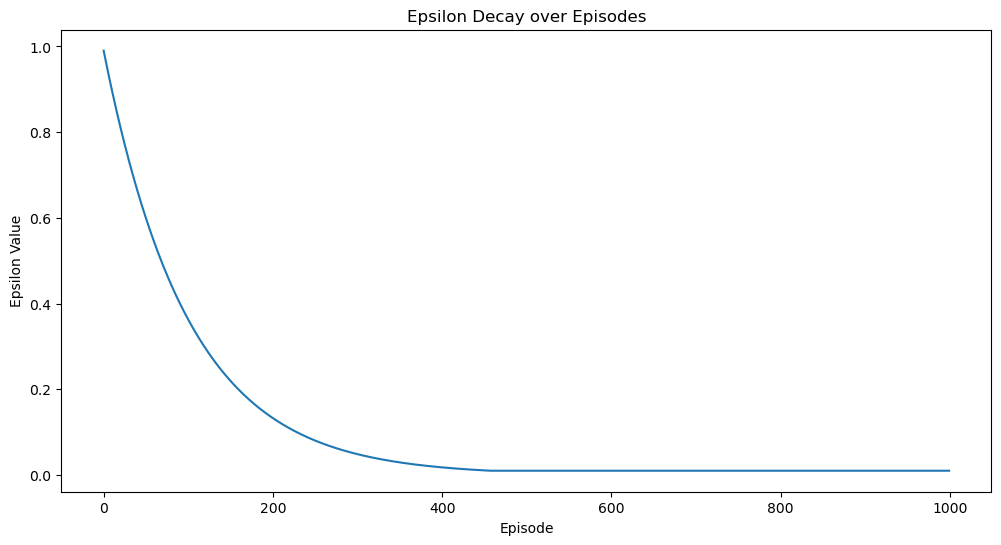

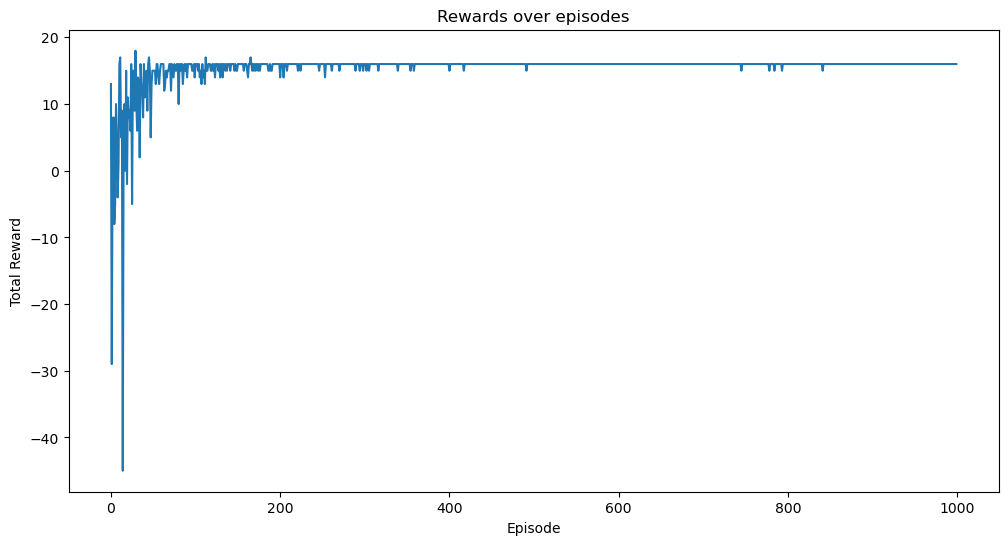

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(agent.epsilon_history)
plt.title('Epsilon Decay over Episodes')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.show()



# Plot the rewards
plt.figure(figsize=(12, 6))
plt.plot(rewards)
plt.title('Rewards over episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()


## Greedy Policy

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


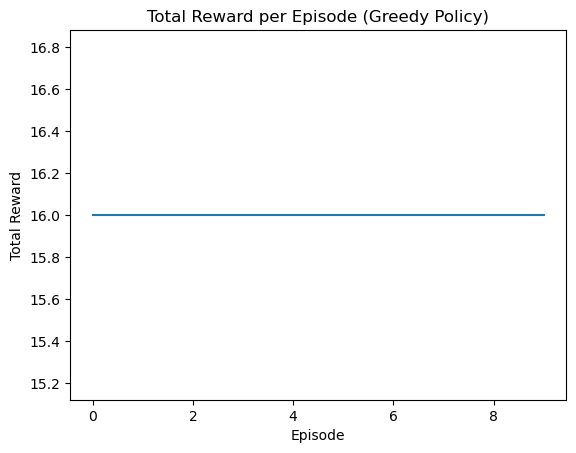

In [8]:
def run_greedy_policy(env, agent, num_episodes):
    rewards = []
    original_epsilon = agent.epsilon
    agent.epsilon = 0  # Set epsilon to 0 for greedy action selection

    for episode in range(num_episodes):
        state = tuple(env.reset())
        total_reward = 0
        done = False

        while not done:
            action = agent.choose_action(state)
            next_state_array, reward, done, _ = env.step(action)
            next_state = tuple(next_state_array)
            total_reward += reward
            state = next_state

        rewards.append(total_reward)
        print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

    agent.epsilon = original_epsilon  # Reset epsilon to its original value
    return rewards

# Run the environment with greedy policy
num_episodes = 10
greedy_rewards = run_greedy_policy(env, agent, num_episodes)

# Plot the rewards
plt.plot(greedy_rewards)
plt.title('Total Reward per Episode (Greedy Policy)')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()


## Hyperparameter tuning for SARSA

Initial Q-table:
Number of states in Q-table: 0
Training with γ=0.8 and ε_decay=0.95...
Episode: 1, Total Reward: 10
Episode: 2, Total Reward: -7
Episode: 3, Total Reward: -12
Episode: 4, Total Reward: 7
Episode: 5, Total Reward: 11
Episode: 6, Total Reward: 10
Episode: 7, Total Reward: 11
Episode: 8, Total Reward: 10
Episode: 9, Total Reward: 15
Episode: 10, Total Reward: 12
Episode: 11, Total Reward: 15
Episode: 12, Total Reward: 11
Episode: 13, Total Reward: 12
Episode: 14, Total Reward: 13
Episode: 15, Total Reward: 15
Episode: 16, Total Reward: 15
Episode: 17, Total Reward: 16
Episode: 18, Total Reward: 12
Episode: 19, Total Reward: 15
Episode: 20, Total Reward: 17
Episode: 21, Total Reward: 14
Episode: 22, Total Reward: 16
Episode: 23, Total Reward: 16
Episode: 24, Total Reward: 15
Episode: 25, Total Reward: 16
Episode: 26, Total Reward: 16
Episode: 27, Total Reward: 15
Episode: 28, Total Reward: 14
Episode: 29, Total Reward: 14
Episode: 30, Total Reward: 16
Episode: 31, Total Re

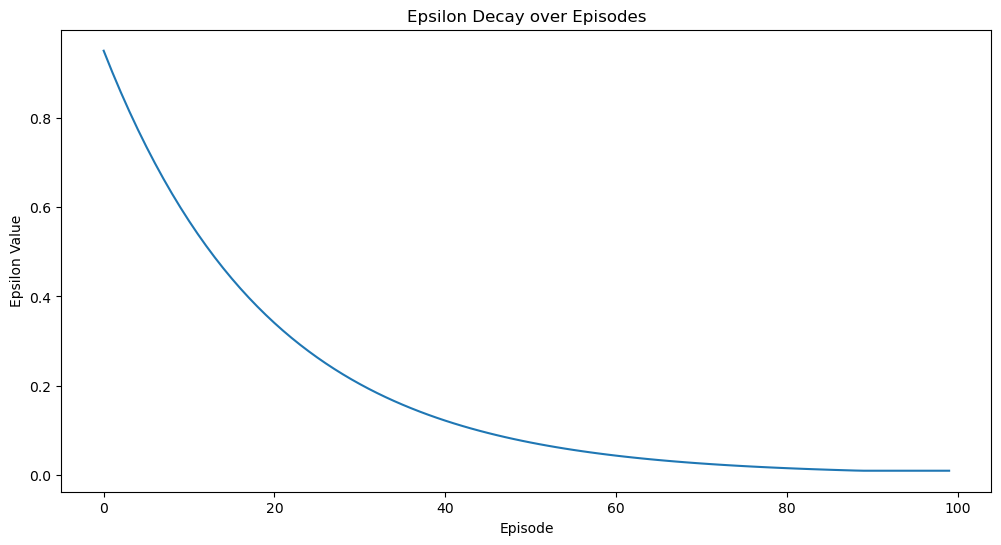

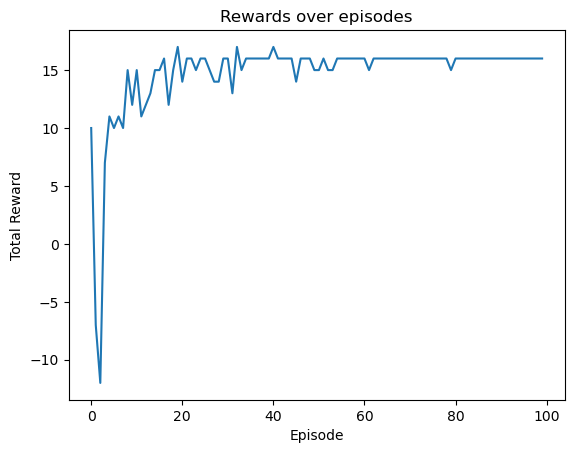

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


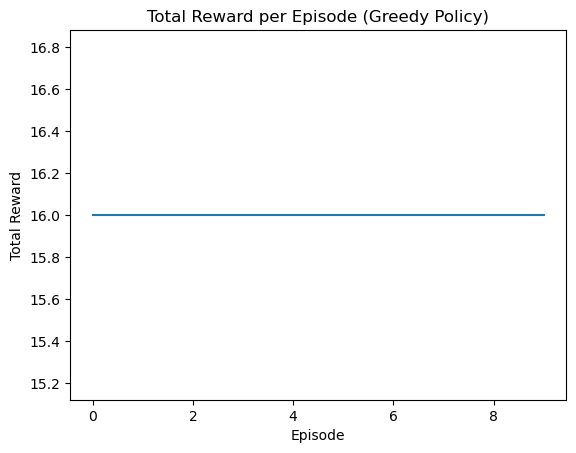

--------------------------------------------------------------------------------
Initial Q-table:
Number of states in Q-table: 0
Training with γ=0.8 and ε_decay=0.99...
Episode: 1, Total Reward: -49
Episode: 2, Total Reward: 9
Episode: 3, Total Reward: 14
Episode: 4, Total Reward: -1
Episode: 5, Total Reward: 3
Episode: 6, Total Reward: 8
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 1
Episode: 10, Total Reward: 6
Episode: 11, Total Reward: 3
Episode: 12, Total Reward: 15
Episode: 13, Total Reward: 16
Episode: 14, Total Reward: 10
Episode: 15, Total Reward: -2
Episode: 16, Total Reward: 13
Episode: 17, Total Reward: 16
Episode: 18, Total Reward: 15
Episode: 19, Total Reward: 11
Episode: 20, Total Reward: 8
Episode: 21, Total Reward: 4
Episode: 22, Total Reward: -22
Episode: 23, Total Reward: 11
Episode: 24, Total Reward: 17
Episode: 25, Total Reward: 9
Episode: 26, Total Reward: 16
Episode: 27, Total Reward: 14
Episode: 28, Total Reward: 5
Episode:

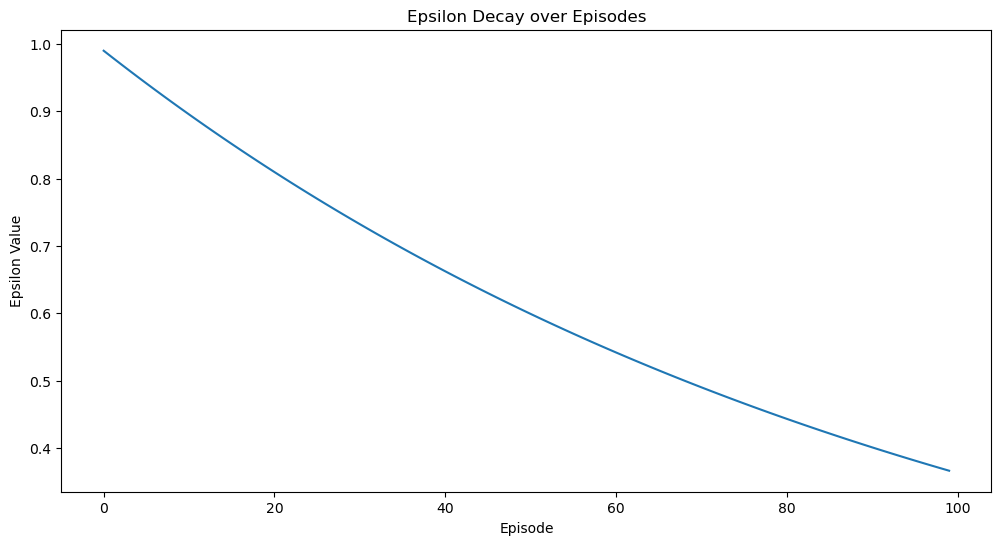

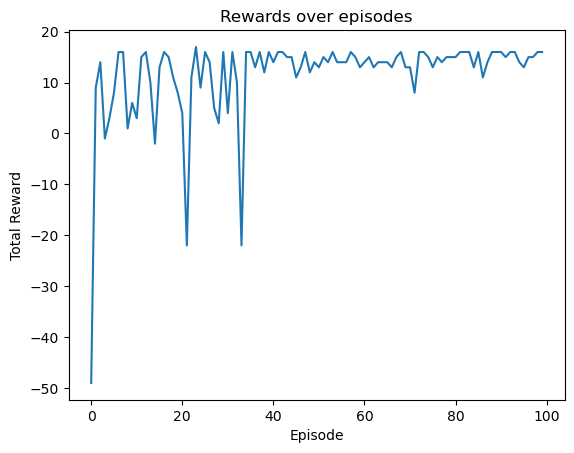

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


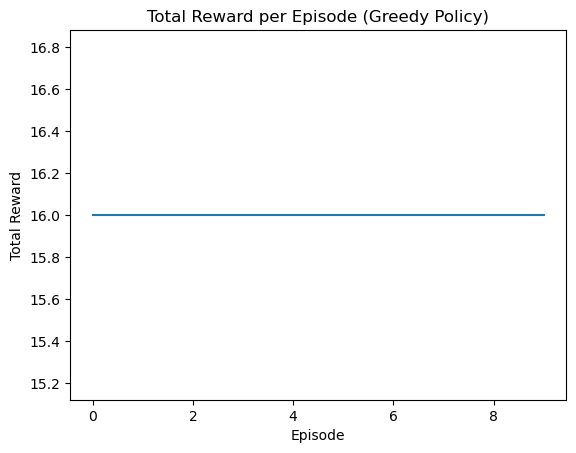

--------------------------------------------------------------------------------
Initial Q-table:
Number of states in Q-table: 0
Training with γ=0.8 and ε_decay=0.995...
Episode: 1, Total Reward: -3
Episode: 2, Total Reward: 3
Episode: 3, Total Reward: -20
Episode: 4, Total Reward: 5
Episode: 5, Total Reward: -17
Episode: 6, Total Reward: -4
Episode: 7, Total Reward: -5
Episode: 8, Total Reward: 13
Episode: 9, Total Reward: 11
Episode: 10, Total Reward: 4
Episode: 11, Total Reward: 8
Episode: 12, Total Reward: -5
Episode: 13, Total Reward: -7
Episode: 14, Total Reward: -10
Episode: 15, Total Reward: -11
Episode: 16, Total Reward: 15
Episode: 17, Total Reward: 12
Episode: 18, Total Reward: 10
Episode: 19, Total Reward: 11
Episode: 20, Total Reward: 4
Episode: 21, Total Reward: 15
Episode: 22, Total Reward: 13
Episode: 23, Total Reward: 13
Episode: 24, Total Reward: -11
Episode: 25, Total Reward: -20
Episode: 26, Total Reward: 8
Episode: 27, Total Reward: 13
Episode: 28, Total Reward: 2


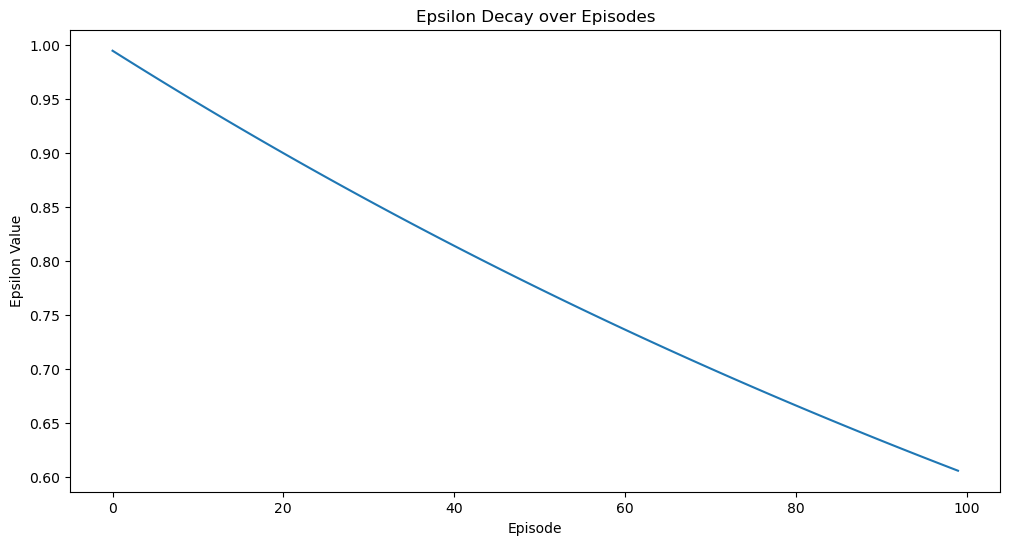

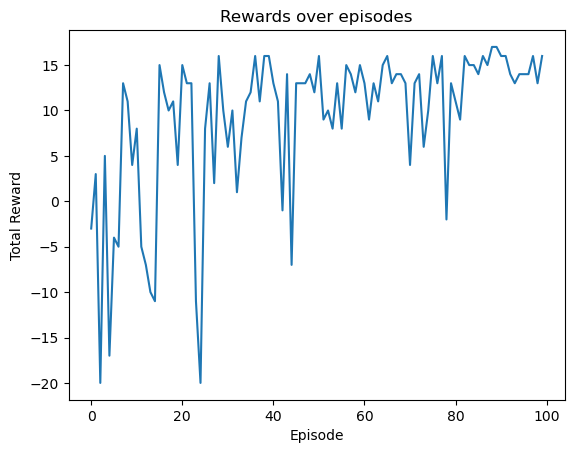

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


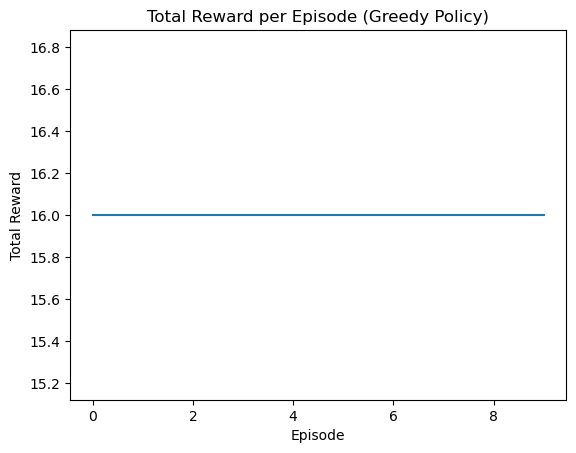

--------------------------------------------------------------------------------
Initial Q-table:
Number of states in Q-table: 0
Training with γ=0.9 and ε_decay=0.95...
Episode: 1, Total Reward: -5
Episode: 2, Total Reward: 13
Episode: 3, Total Reward: 0
Episode: 4, Total Reward: 15
Episode: 5, Total Reward: 4
Episode: 6, Total Reward: 14
Episode: 7, Total Reward: 14
Episode: 8, Total Reward: 11
Episode: 9, Total Reward: 15
Episode: 10, Total Reward: 14
Episode: 11, Total Reward: 16
Episode: 12, Total Reward: 10
Episode: 13, Total Reward: 9
Episode: 14, Total Reward: 15
Episode: 15, Total Reward: 15
Episode: 16, Total Reward: 11
Episode: 17, Total Reward: 14
Episode: 18, Total Reward: 15
Episode: 19, Total Reward: 15
Episode: 20, Total Reward: 16
Episode: 21, Total Reward: 16
Episode: 22, Total Reward: 15
Episode: 23, Total Reward: 16
Episode: 24, Total Reward: 16
Episode: 25, Total Reward: 16
Episode: 26, Total Reward: 16
Episode: 27, Total Reward: 16
Episode: 28, Total Reward: 16
Epi

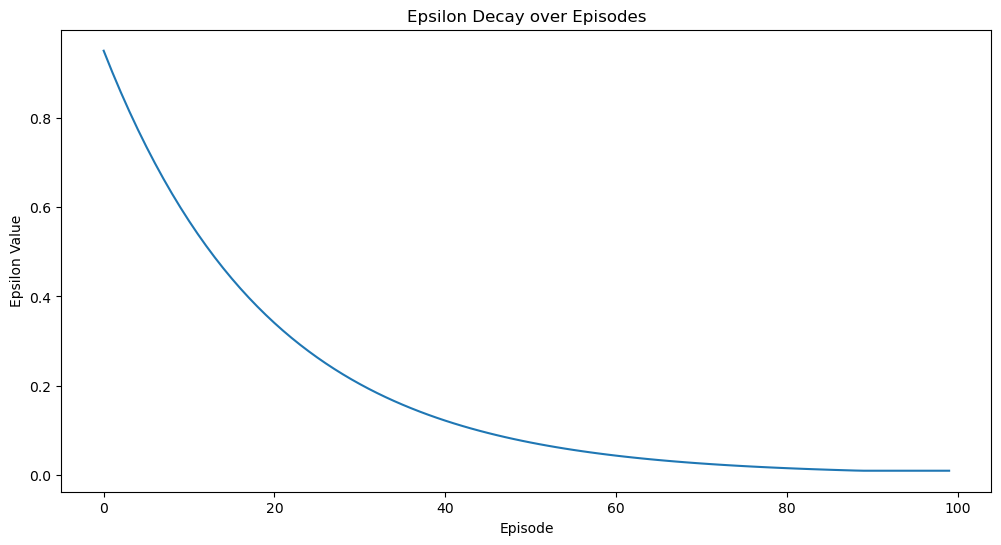

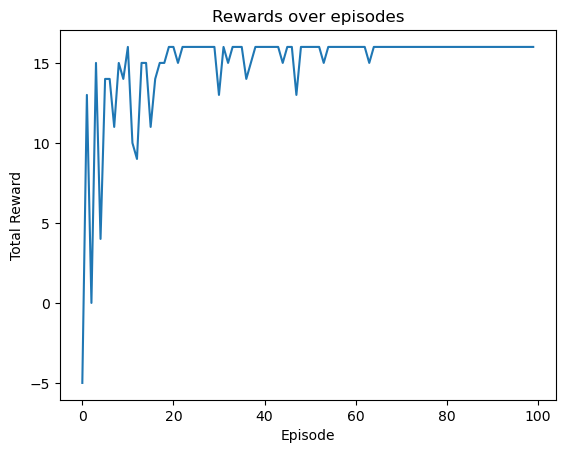

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


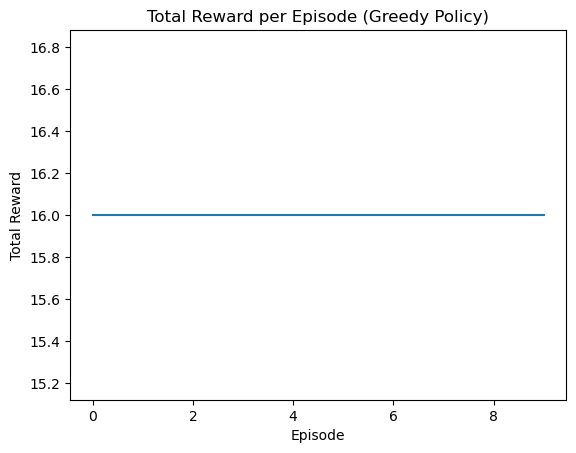

--------------------------------------------------------------------------------
Initial Q-table:
Number of states in Q-table: 0
Training with γ=0.9 and ε_decay=0.99...
Episode: 1, Total Reward: -7
Episode: 2, Total Reward: -16
Episode: 3, Total Reward: -23
Episode: 4, Total Reward: -3
Episode: 5, Total Reward: 0
Episode: 6, Total Reward: -3
Episode: 7, Total Reward: 9
Episode: 8, Total Reward: 12
Episode: 9, Total Reward: 6
Episode: 10, Total Reward: 11
Episode: 11, Total Reward: 8
Episode: 12, Total Reward: 9
Episode: 13, Total Reward: 15
Episode: 14, Total Reward: 8
Episode: 15, Total Reward: 7
Episode: 16, Total Reward: 12
Episode: 17, Total Reward: 13
Episode: 18, Total Reward: 11
Episode: 19, Total Reward: 14
Episode: 20, Total Reward: 10
Episode: 21, Total Reward: 11
Episode: 22, Total Reward: 15
Episode: 23, Total Reward: 14
Episode: 24, Total Reward: 14
Episode: 25, Total Reward: 6
Episode: 26, Total Reward: 12
Episode: 27, Total Reward: 15
Episode: 28, Total Reward: 11
Episod

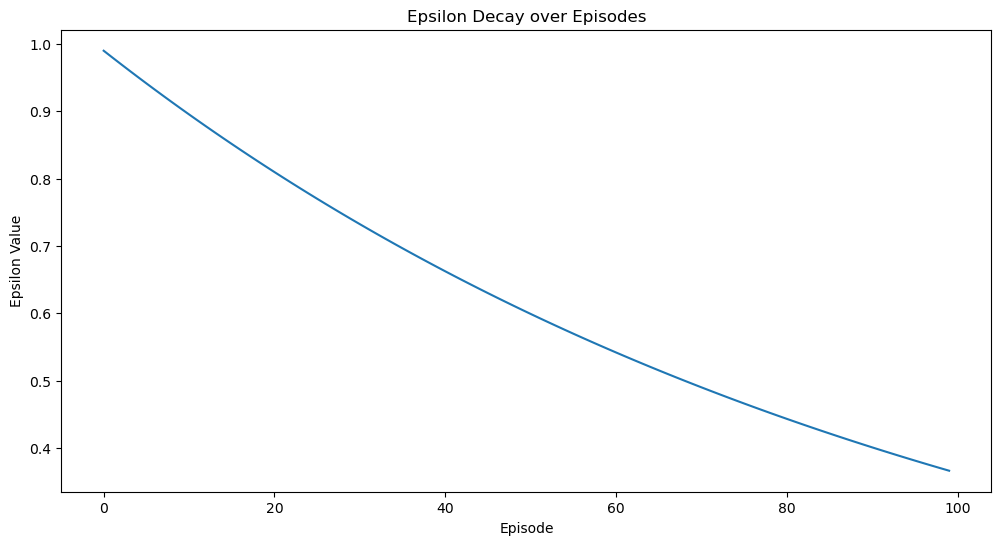

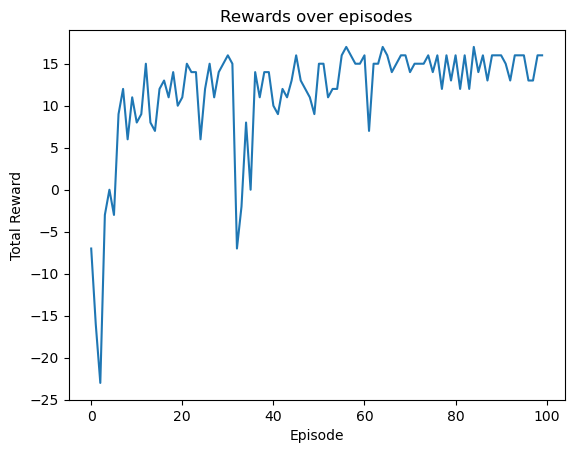

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


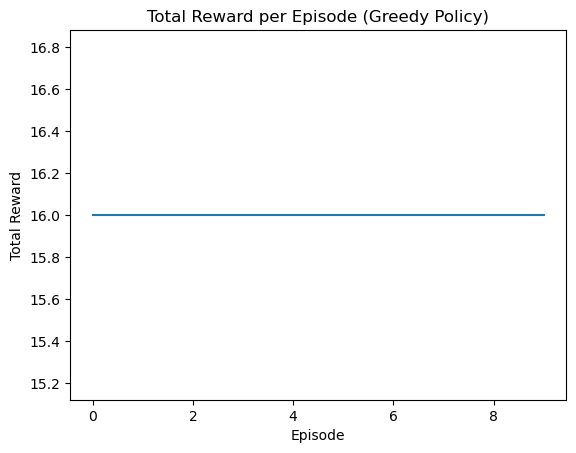

--------------------------------------------------------------------------------
Initial Q-table:
Number of states in Q-table: 0
Training with γ=0.9 and ε_decay=0.995...
Episode: 1, Total Reward: -49
Episode: 2, Total Reward: -3
Episode: 3, Total Reward: 8
Episode: 4, Total Reward: 11
Episode: 5, Total Reward: -7
Episode: 6, Total Reward: -48
Episode: 7, Total Reward: -26
Episode: 8, Total Reward: -3
Episode: 9, Total Reward: 11
Episode: 10, Total Reward: 8
Episode: 11, Total Reward: 6
Episode: 12, Total Reward: 15
Episode: 13, Total Reward: 15
Episode: 14, Total Reward: 15
Episode: 15, Total Reward: 15
Episode: 16, Total Reward: 12
Episode: 17, Total Reward: 6
Episode: 18, Total Reward: -2
Episode: 19, Total Reward: 1
Episode: 20, Total Reward: 13
Episode: 21, Total Reward: -17
Episode: 22, Total Reward: 10
Episode: 23, Total Reward: 0
Episode: 24, Total Reward: 14
Episode: 25, Total Reward: 12
Episode: 26, Total Reward: 13
Episode: 27, Total Reward: 9
Episode: 28, Total Reward: 15
Ep

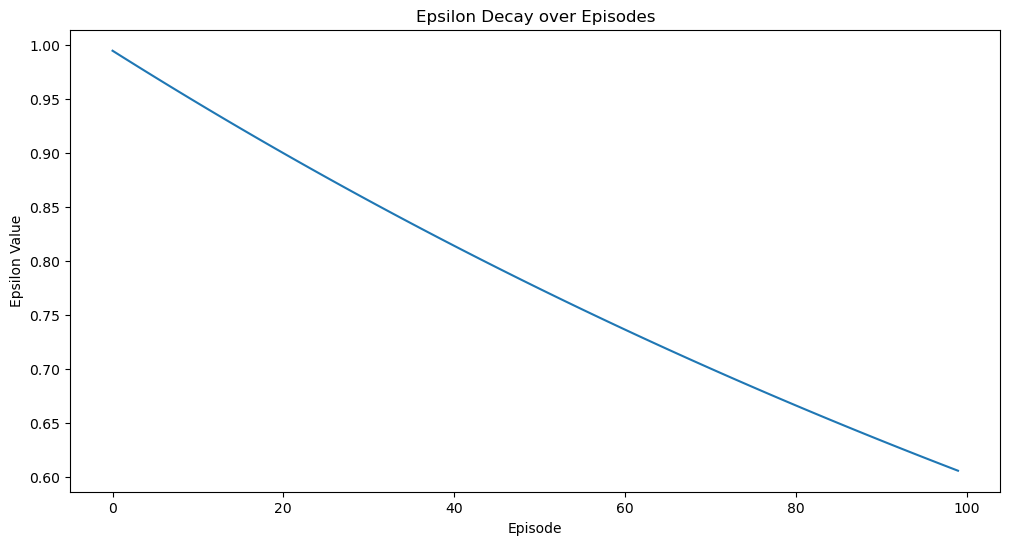

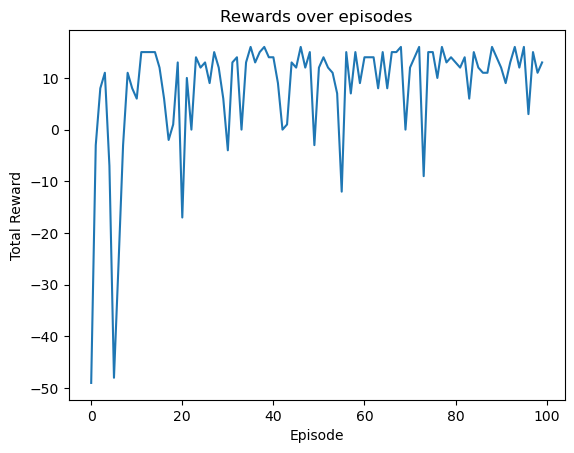

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


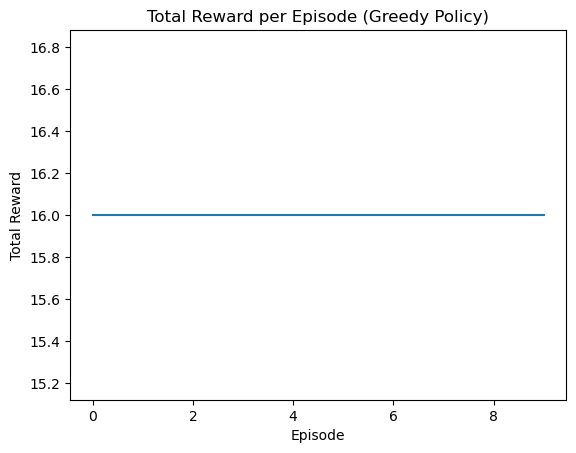

--------------------------------------------------------------------------------
Initial Q-table:
Number of states in Q-table: 0
Training with γ=0.99 and ε_decay=0.95...
Episode: 1, Total Reward: 11
Episode: 2, Total Reward: -3
Episode: 3, Total Reward: 8
Episode: 4, Total Reward: 14
Episode: 5, Total Reward: 8
Episode: 6, Total Reward: 5
Episode: 7, Total Reward: 5
Episode: 8, Total Reward: 10
Episode: 9, Total Reward: 15
Episode: 10, Total Reward: 10
Episode: 11, Total Reward: 15
Episode: 12, Total Reward: 14
Episode: 13, Total Reward: 16
Episode: 14, Total Reward: 10
Episode: 15, Total Reward: 17
Episode: 16, Total Reward: 13
Episode: 17, Total Reward: 15
Episode: 18, Total Reward: 15
Episode: 19, Total Reward: 15
Episode: 20, Total Reward: 16
Episode: 21, Total Reward: 16
Episode: 22, Total Reward: 16
Episode: 23, Total Reward: 14
Episode: 24, Total Reward: 15
Episode: 25, Total Reward: 12
Episode: 26, Total Reward: 15
Episode: 27, Total Reward: 15
Episode: 28, Total Reward: 16
Epi

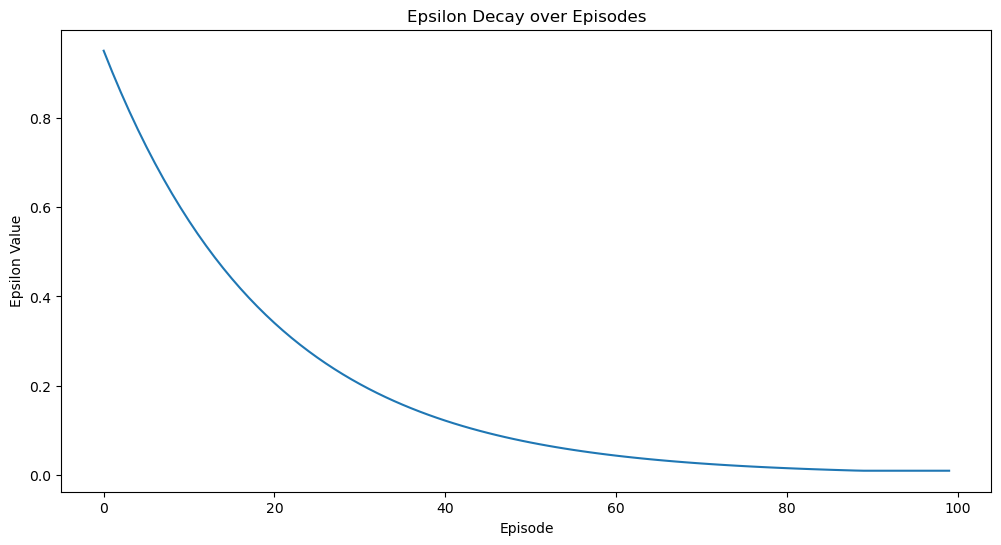

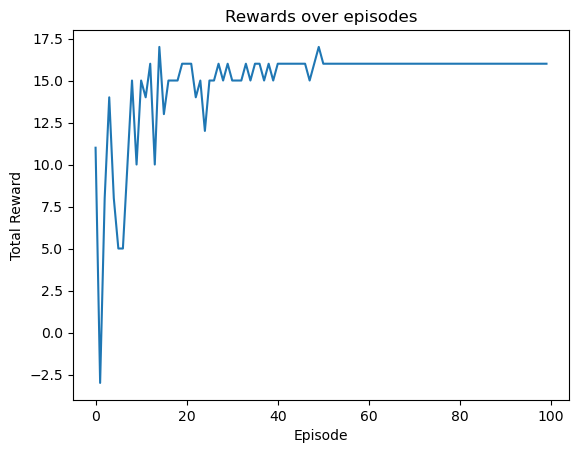

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


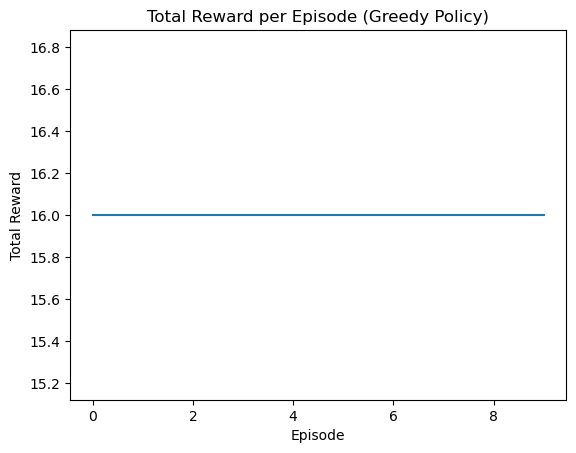

--------------------------------------------------------------------------------
Initial Q-table:
Number of states in Q-table: 0
Training with γ=0.99 and ε_decay=0.99...
Episode: 1, Total Reward: -4
Episode: 2, Total Reward: -42
Episode: 3, Total Reward: -19
Episode: 4, Total Reward: 15
Episode: 5, Total Reward: -13
Episode: 6, Total Reward: -29
Episode: 7, Total Reward: 6
Episode: 8, Total Reward: 8
Episode: 9, Total Reward: 12
Episode: 10, Total Reward: -2
Episode: 11, Total Reward: 12
Episode: 12, Total Reward: -6
Episode: 13, Total Reward: 12
Episode: 14, Total Reward: 10
Episode: 15, Total Reward: 6
Episode: 16, Total Reward: 12
Episode: 17, Total Reward: 5
Episode: 18, Total Reward: 13
Episode: 19, Total Reward: 7
Episode: 20, Total Reward: 6
Episode: 21, Total Reward: 15
Episode: 22, Total Reward: 10
Episode: 23, Total Reward: 12
Episode: 24, Total Reward: 13
Episode: 25, Total Reward: 7
Episode: 26, Total Reward: 11
Episode: 27, Total Reward: 12
Episode: 28, Total Reward: 7
Epi

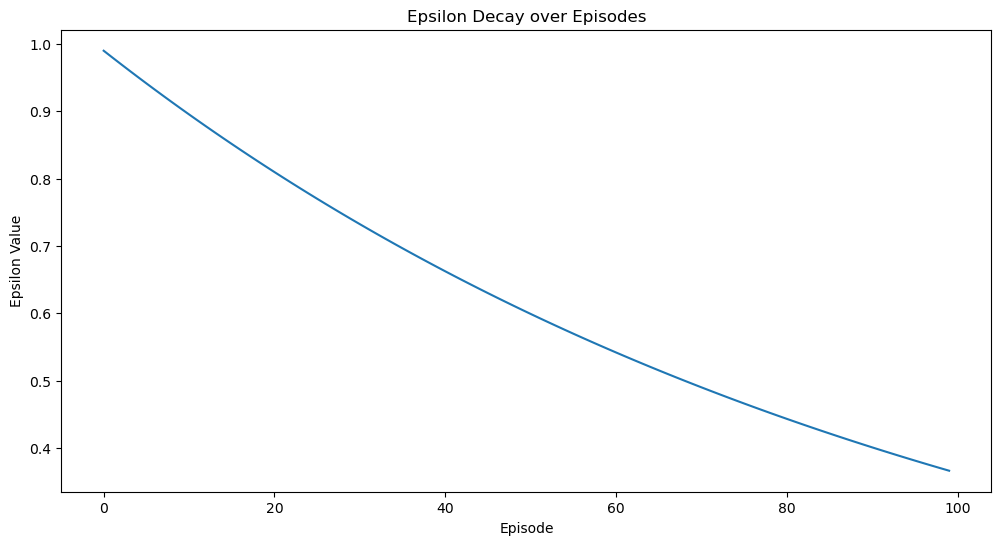

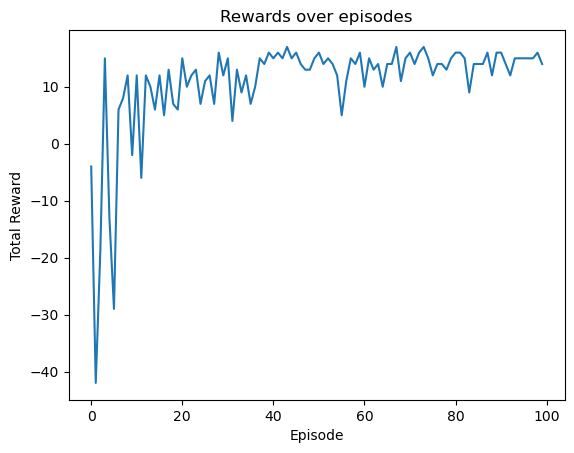

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


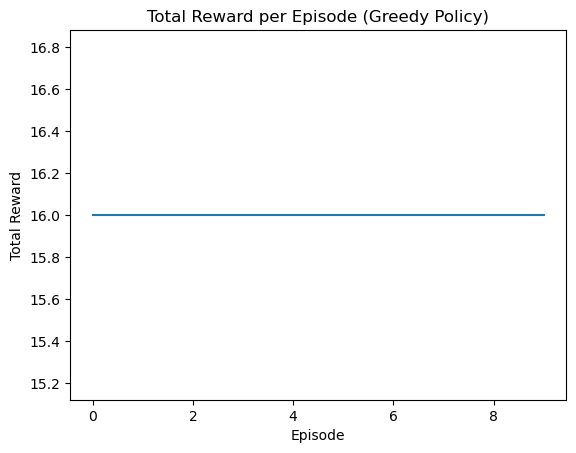

--------------------------------------------------------------------------------
Initial Q-table:
Number of states in Q-table: 0
Training with γ=0.99 and ε_decay=0.995...
Episode: 1, Total Reward: -21
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: -14
Episode: 4, Total Reward: -25
Episode: 5, Total Reward: -48
Episode: 6, Total Reward: -9
Episode: 7, Total Reward: -4
Episode: 8, Total Reward: 15
Episode: 9, Total Reward: -1
Episode: 10, Total Reward: -10
Episode: 11, Total Reward: 3
Episode: 12, Total Reward: 5
Episode: 13, Total Reward: 0
Episode: 14, Total Reward: 13
Episode: 15, Total Reward: -9
Episode: 16, Total Reward: 5
Episode: 17, Total Reward: 12
Episode: 18, Total Reward: 3
Episode: 19, Total Reward: 14
Episode: 20, Total Reward: -14
Episode: 21, Total Reward: -15
Episode: 22, Total Reward: 10
Episode: 23, Total Reward: 17
Episode: 24, Total Reward: 10
Episode: 25, Total Reward: 12
Episode: 26, Total Reward: 15
Episode: 27, Total Reward: 13
Episode: 28, Total Reward:

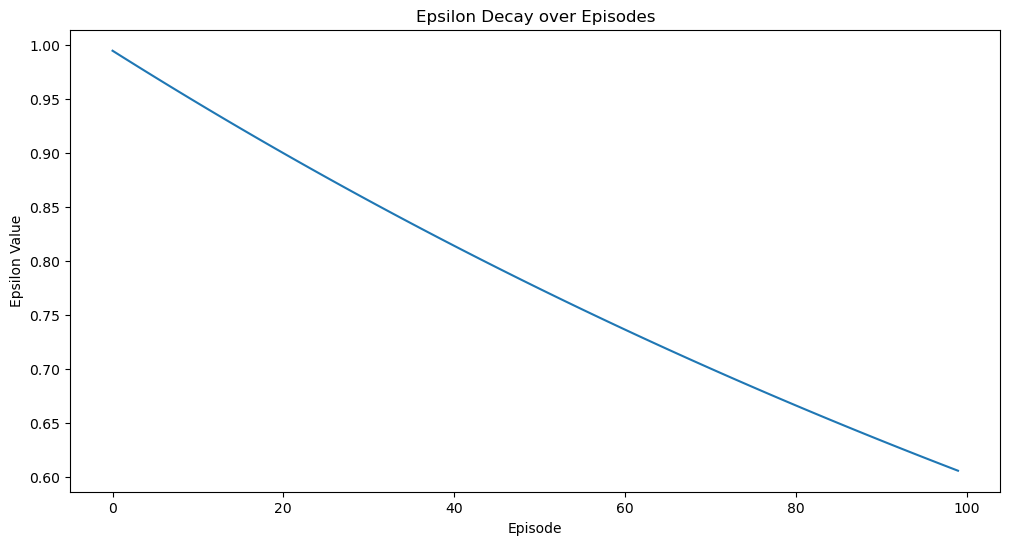

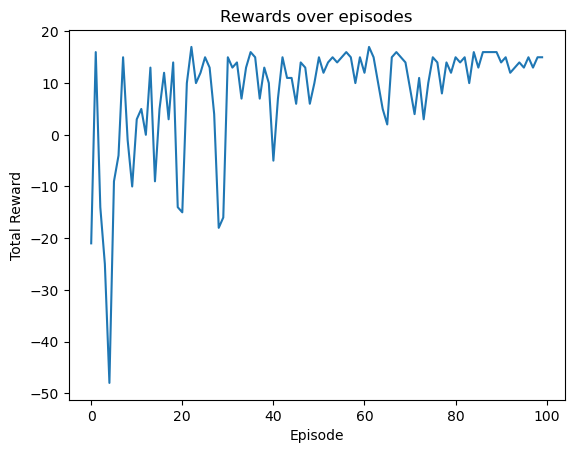

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


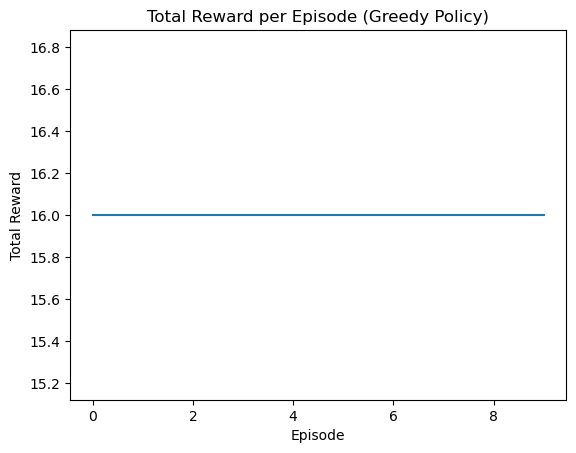

--------------------------------------------------------------------------------
The best parameters were γ=0.8 and ε_decay=0.95 with an average reward of 16.0
The best greedy parameters were γ=0.8 and ε_decay=0.95 with an average greedy reward of 16.0


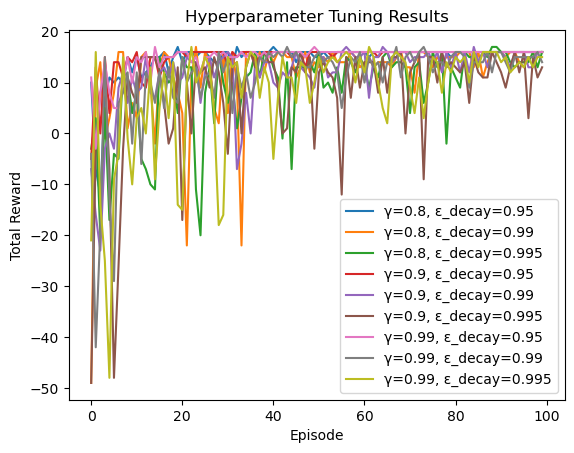

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the hyperparameter grid
gamma_values = [0.8, 0.9, 0.99]
epsilon_decay_values = [0.95, 0.99, 0.995]

# Store the results
tuning_results = {}
greedy_results = {}

# Best parameter initialization
best_params = None
best_avg_reward = -np.inf  # Start with the worst possible reward
best_avg_greedy_reward = -np.inf 

# Nested loops for hyperparameter grid search
for gamma in gamma_values:
    for epsilon_decay in epsilon_decay_values:
        # Initialize the agent with the current set of hyperparameters
        agent = SARSAAgent(alpha, gamma, epsilon, epsilon_decay, min_epsilon, action_space, state_space)
        
        print("Initial Q-table:")
        print(f"Number of states in Q-table: {len(agent.q_table)}")
        # Train the agent
        print(f"Training with γ={gamma} and ε_decay={epsilon_decay}...")
        
        rewards = agent.train(env, 100, max_steps)
        
        print("Final Q-Table:")
        print_q_table(agent.q_table)
        
         # Store the results
        tuning_results[(gamma, epsilon_decay)] = rewards

        # Calculate the average reward
        avg_reward = np.mean(rewards[-10:])  # average of the last 10 episodes for stability

        # Update the best parameters if the current average reward is better
        if avg_reward > best_avg_reward:
            best_avg_reward = avg_reward
            best_params = (gamma, epsilon_decay)

        # Print the summary of the results
        print(f"Completed γ={gamma}, ε_decay={epsilon_decay}. Average Reward: {avg_reward}\n")
        
        plt.figure(figsize=(12, 6))
        plt.plot(agent.epsilon_history)
        plt.title('Epsilon Decay over Episodes')
        plt.xlabel('Episode')
        plt.ylabel('Epsilon Value')
        plt.show()
        
        # Plot the rewards
        plt.plot(rewards)
        plt.title('Rewards over episodes')
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.show()
        
        num_episodes = 10
        greedy_rewards = run_greedy_policy(env, agent, num_episodes)
        greedy_results[(gamma, epsilon_decay)] = np.mean(greedy_rewards)
        
        avg_greedy_reward = np.mean(greedy_rewards)
        if avg_greedy_reward > best_avg_greedy_reward:
            best_avg_greedy_reward = avg_greedy_reward
            best_params_greedy = (gamma, epsilon_decay)
        
        plt.plot(greedy_rewards)
        plt.title('Total Reward per Episode (Greedy Policy)')
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.show()
        
       
        print("--------------------------------------------------------------------------------")

# Print the best parameters
print(f"The best parameters were γ={best_params[0]} and ε_decay={best_params[1]} with an average reward of {best_avg_reward}")
print(f"The best greedy parameters were γ={best_params_greedy[0]} and ε_decay={best_params_greedy[1]} with an average greedy reward of {best_avg_greedy_reward}")

# After training, analyze and plot the results
for params, rewards in tuning_results.items():
    plt.plot(rewards, label=f"γ={params[0]}, ε_decay={params[1]}")

plt.title('Hyperparameter Tuning Results')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.show()


## Plot for Avg reward vs Gamma & Average reward vs Epsilon decay

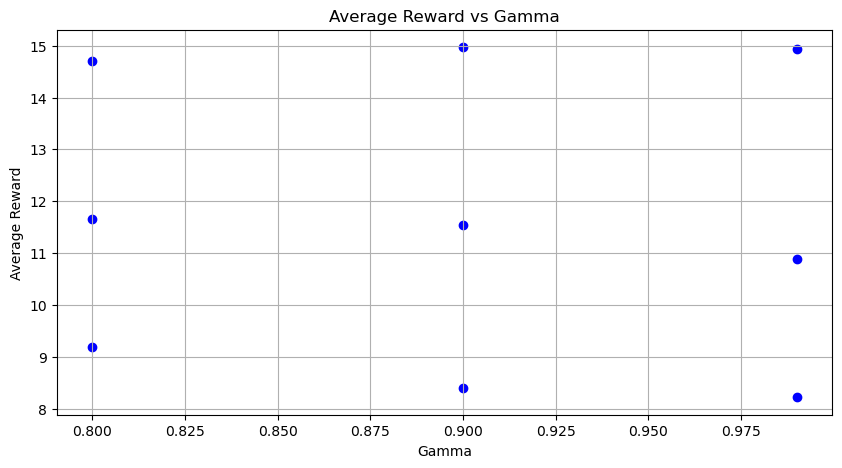

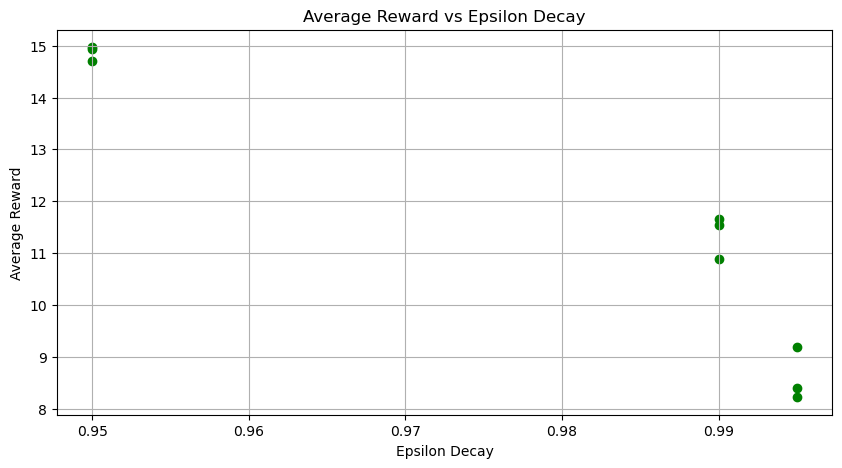

In [10]:
# Prepare data for plotting
gamma_values = []
epsilon_decay_values = []
average_rewards = []

for params, rewards in tuning_results.items():
    gamma_values.append(params[0])
    epsilon_decay_values.append(params[1])
    average_rewards.append(np.mean(rewards))  # Compute the average reward for each parameter set

# Scatter plot for Average Reward vs Gamma
plt.figure(figsize=(10, 5))
plt.scatter(gamma_values, average_rewards, color='blue')
plt.title('Average Reward vs Gamma')
plt.xlabel('Gamma')
plt.ylabel('Average Reward')
plt.grid(True)
plt.show()

# Scatter plot for Average Reward vs Epsilon Decay
plt.figure(figsize=(10, 5))
plt.scatter(epsilon_decay_values, average_rewards, color='green')
plt.title('Average Reward vs Epsilon Decay')
plt.xlabel('Epsilon Decay')
plt.ylabel('Average Reward')
plt.grid(True)
plt.show()


## Double Q-learning Implementation

In [11]:
class DoubleQLearningAgent:
    def __init__(self, alpha, gamma, epsilon, epsilon_decay, min_epsilon, action_space, state_space):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.action_space = action_space
        self.state_space = state_space
        self.Q1 = defaultdict(lambda: np.zeros(action_space.n))
        self.Q2 = defaultdict(lambda: np.zeros(action_space.n))
        self.epsilon_history = []

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.action_space.n)
        else:
            combined_q_values = np.add(self.Q1[state], self.Q2[state])
            return np.argmax(combined_q_values)

            
    def update(self, state, action, reward, next_state, done):
        if np.random.uniform(0, 1) < 0.5:
            if not done:
                best_next_action = np.argmax(self.Q1[next_state])
                temporal_target = reward + self.gamma * self.Q2[next_state][best_next_action]
            else:
                temporal_target = reward
            temporal_difference = temporal_target - self.Q1[state][action]
            self.Q1[state][action] += self.alpha * temporal_difference
        else:
            if not done:
                best_next_action = np.argmax(self.Q2[next_state])
                temporal_target = reward + self.gamma * self.Q1[next_state][best_next_action]
            else:
                temporal_target = reward
            temporal_difference = temporal_target - self.Q2[state][action]
            self.Q2[state][action] += self.alpha * temporal_difference

    def train(self, env, num_episodes, max_steps):
        rewards = []
        for episode in range(num_episodes):
            current_state = env.reset()
            state = tuple(current_state)
            action = self.choose_action(state)
            total_reward = 0
            done = False
            for step in range(max_steps):
                next_state_array, reward, done, _ = env.step(action)
                next_state = tuple(next_state_array)
                next_action = self.choose_action(next_state)
                self.update(state, action, reward, next_state, done)
                state = next_state
                action = next_action
                total_reward += reward
                if done:
                    break
            rewards.append(total_reward)
            self.epsilon = max(self.epsilon * self.epsilon_decay, self.min_epsilon)
            self.epsilon_history.append(self.epsilon)
            print(f"Episode: {episode+1}, Total Reward: {total_reward}")
        return rewards


## Parameters and Implementation for Double Q learning


Initial Q1-Table:

Initial Q2-Table:
Episode: 1, Total Reward: 2
Episode: 2, Total Reward: 3
Episode: 3, Total Reward: -44
Episode: 4, Total Reward: 12
Episode: 5, Total Reward: -46
Episode: 6, Total Reward: -10
Episode: 7, Total Reward: -12
Episode: 8, Total Reward: 3
Episode: 9, Total Reward: -42
Episode: 10, Total Reward: 13
Episode: 11, Total Reward: 12
Episode: 12, Total Reward: -15
Episode: 13, Total Reward: -4
Episode: 14, Total Reward: 15
Episode: 15, Total Reward: 3
Episode: 16, Total Reward: 1
Episode: 17, Total Reward: 0
Episode: 18, Total Reward: -44
Episode: 19, Total Reward: 16
Episode: 20, Total Reward: 1
Episode: 21, Total Reward: 1
Episode: 22, Total Reward: -9
Episode: 23, Total Reward: 12
Episode: 24, Total Reward: 5
Episode: 25, Total Reward: 13
Episode: 26, Total Reward: 15
Episode: 27, Total Reward: 13
Episode: 28, Total Reward: 15
Episode: 29, Total Reward: 15
Episode: 30, Total Reward: 3
Episode: 31, Total Reward: 7
Episode: 32, Total Reward: 14
Episode: 33, To

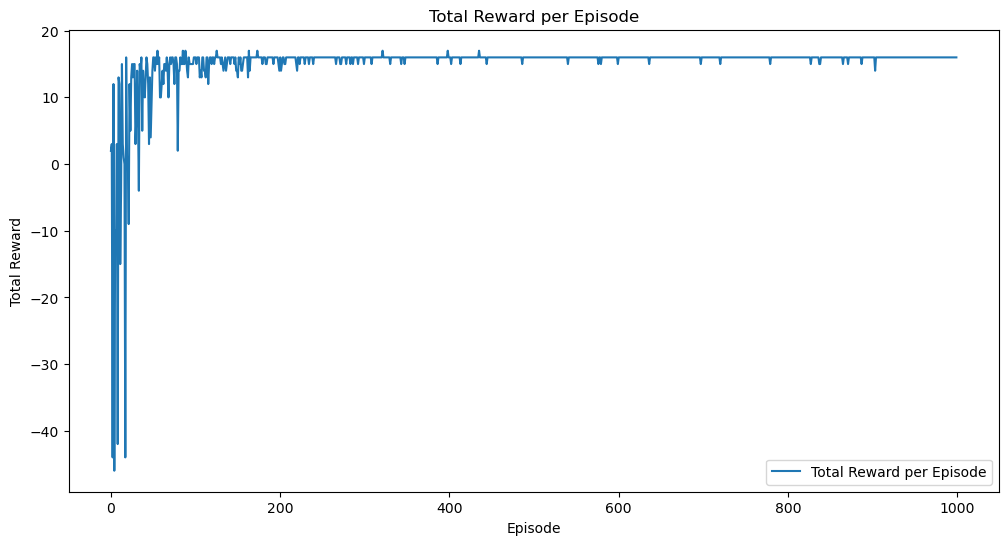

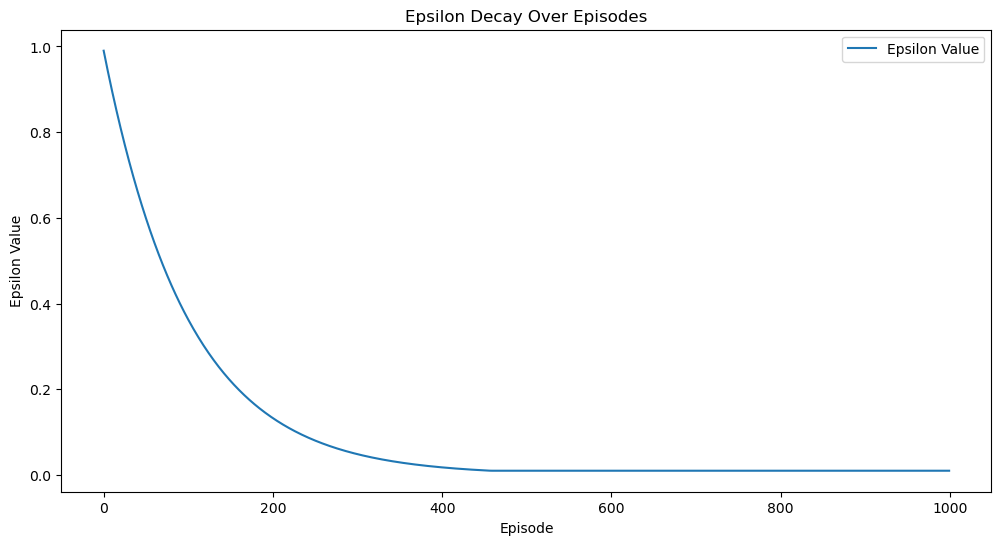

In [12]:
# Parameters for Double Q-Learning
alpha = 0.1
gamma = 0.9
epsilon = 1.0
epsilon_decay = 0.99
min_epsilon = 0.01
num_episodes = 1000
max_steps = 100


# Initialize the environment and agent
env = SearchRescueEnv()
agent = DoubleQLearningAgent(alpha, gamma, epsilon, epsilon_decay, min_epsilon, env.action_space, env.observation_space)

# Function to print Q-tables
def print_q_table(q_table, name):
    print(f"\n{name}:")
    for state, action_values in q_table.items():
        state_str = f"State: {state}"
        action_str = " | ".join([f"Action {i}: {val:.2f}" for i, val in enumerate(action_values)])
        print(state_str, action_str)

# Print the initial Q-tables
print_q_table(agent.Q1, "Initial Q1-Table")
print_q_table(agent.Q2, "Initial Q2-Table")

# Train the agent
rewards = agent.train(env, num_episodes, max_steps)

# Print the trained Q-tables
print_q_table(agent.Q1, "Trained Q1-Table")
print_q_table(agent.Q2, "Trained Q2-Table")

# Plot the total reward per episode graph
plt.figure(figsize=(12, 6))
plt.plot(rewards, label='Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.legend()
plt.show()

# Plot the epsilon decay graph
plt.figure(figsize=(12, 6))
plt.plot(agent.epsilon_history, label='Epsilon Value')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay Over Episodes')
plt.legend()
plt.show()



## Running Greedy Policy on Double Q algorithm

Greedy Episode 1: Total Reward 16
Greedy Episode 2: Total Reward 16
Greedy Episode 3: Total Reward 16
Greedy Episode 4: Total Reward 16
Greedy Episode 5: Total Reward 16
Greedy Episode 6: Total Reward 16
Greedy Episode 7: Total Reward 16
Greedy Episode 8: Total Reward 16
Greedy Episode 9: Total Reward 16
Greedy Episode 10: Total Reward 16


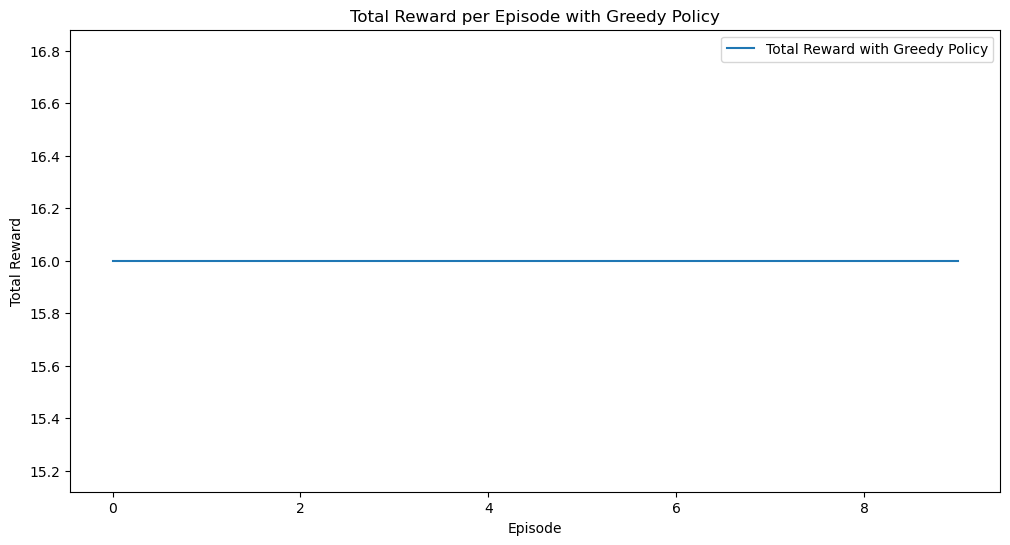

In [13]:
def run_greedy_policy_doubleQ(agent, env, num_episodes):
    greedy_rewards = []
    for episode in range(num_episodes):
        state_array = env.reset()
        state = tuple(state_array)  # Convert to tuple
        total_reward = 0
        done = False
        while not done:
            # Choose the action with the highest combined Q-value from Q1 and Q2
            combined_q_values = np.add(agent.Q1[state], agent.Q2[state])
            action = np.argmax(combined_q_values)
            next_state_array, reward, done, _ = env.step(action)
            state = tuple(next_state_array)  # Update state and convert to tuple
            total_reward += reward
        greedy_rewards.append(total_reward)
        print(f"Greedy Episode {episode + 1}: Total Reward {total_reward}")
    return greedy_rewards

# Now you can use this function to run the greedy policy
greedy_rewards = run_greedy_policy_doubleQ(agent, env, 10)

# Plot the total reward for greedy policy evaluation
plt.figure(figsize=(12, 6))
plt.plot(greedy_rewards, label='Total Reward with Greedy Policy')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode with Greedy Policy')
plt.legend()
plt.show()


## Hyperparameter Tuning for Double Q algorithm

Initial Q-tables for γ=0.8 and ε_decay=0.95:
Q1 Table:
Number of states in Q1-table: 0
Q2 Table:
Number of states in Q2-table: 0
Training with γ=0.8 and ε_decay=0.95...
Episode: 1, Total Reward: -13
Episode: 2, Total Reward: 17
Episode: 3, Total Reward: 14
Episode: 4, Total Reward: -4
Episode: 5, Total Reward: 15
Episode: 6, Total Reward: 12
Episode: 7, Total Reward: 2
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 4
Episode: 10, Total Reward: 15
Episode: 11, Total Reward: 14
Episode: 12, Total Reward: 16
Episode: 13, Total Reward: 14
Episode: 14, Total Reward: 15
Episode: 15, Total Reward: 12
Episode: 16, Total Reward: 16
Episode: 17, Total Reward: 9
Episode: 18, Total Reward: 16
Episode: 19, Total Reward: 15
Episode: 20, Total Reward: 16
Episode: 21, Total Reward: 16
Episode: 22, Total Reward: 16
Episode: 23, Total Reward: 16
Episode: 24, Total Reward: 16
Episode: 25, Total Reward: 14
Episode: 26, Total Reward: 16
Episode: 27, Total Reward: 15
Episode: 28, Total Reward: 15
Ep

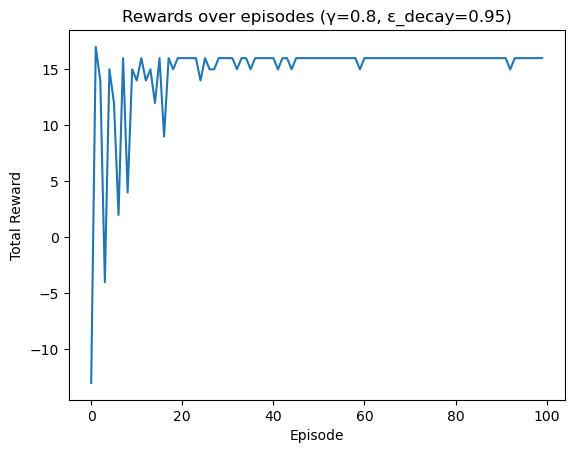

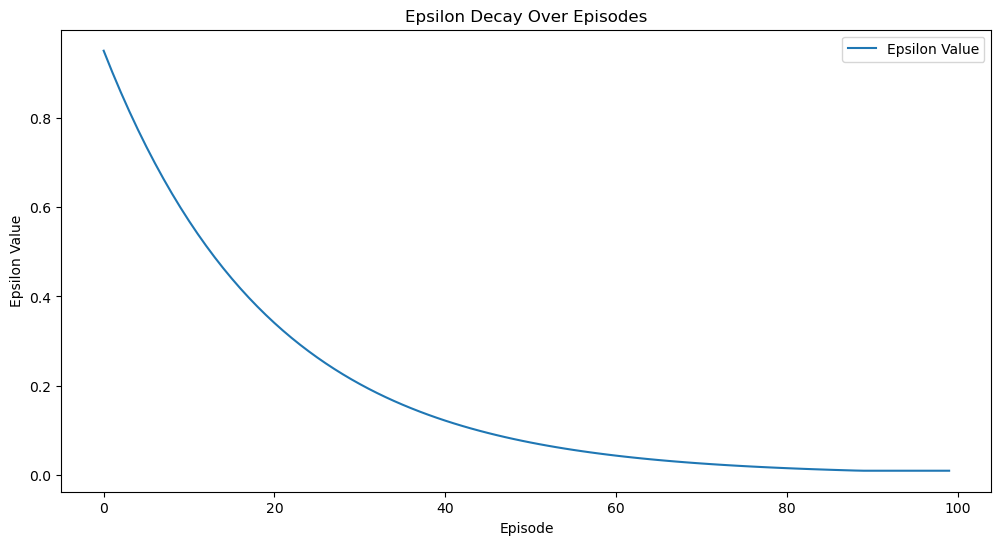

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


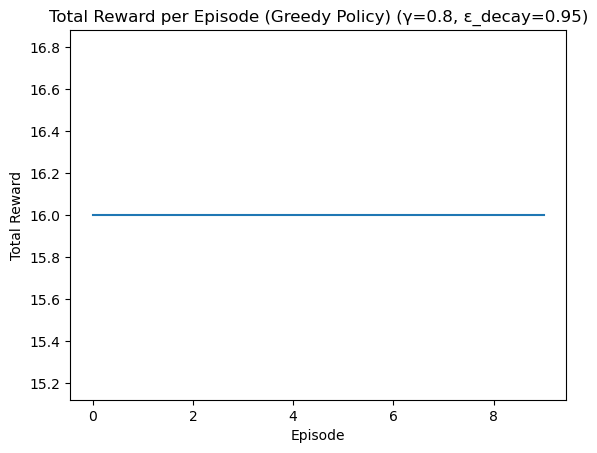

--------------------------------------------------------------------------------
Initial Q-tables for γ=0.8 and ε_decay=0.99:
Q1 Table:
Number of states in Q1-table: 0
Q2 Table:
Number of states in Q2-table: 0
Training with γ=0.8 and ε_decay=0.99...
Episode: 1, Total Reward: -53
Episode: 2, Total Reward: -1
Episode: 3, Total Reward: 4
Episode: 4, Total Reward: -10
Episode: 5, Total Reward: 10
Episode: 6, Total Reward: 7
Episode: 7, Total Reward: 5
Episode: 8, Total Reward: 14
Episode: 9, Total Reward: -53
Episode: 10, Total Reward: 9
Episode: 11, Total Reward: 12
Episode: 12, Total Reward: 9
Episode: 13, Total Reward: -5
Episode: 14, Total Reward: -8
Episode: 15, Total Reward: 11
Episode: 16, Total Reward: 15
Episode: 17, Total Reward: 9
Episode: 18, Total Reward: 14
Episode: 19, Total Reward: -14
Episode: 20, Total Reward: 15
Episode: 21, Total Reward: 0
Episode: 22, Total Reward: 11
Episode: 23, Total Reward: 6
Episode: 24, Total Reward: 6
Episode: 25, Total Reward: 5
Episode: 26, To

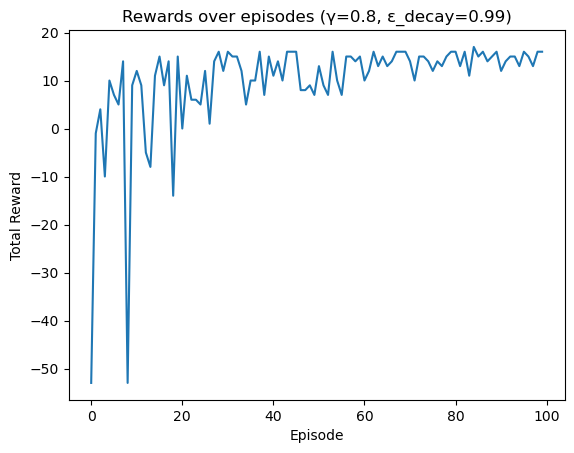

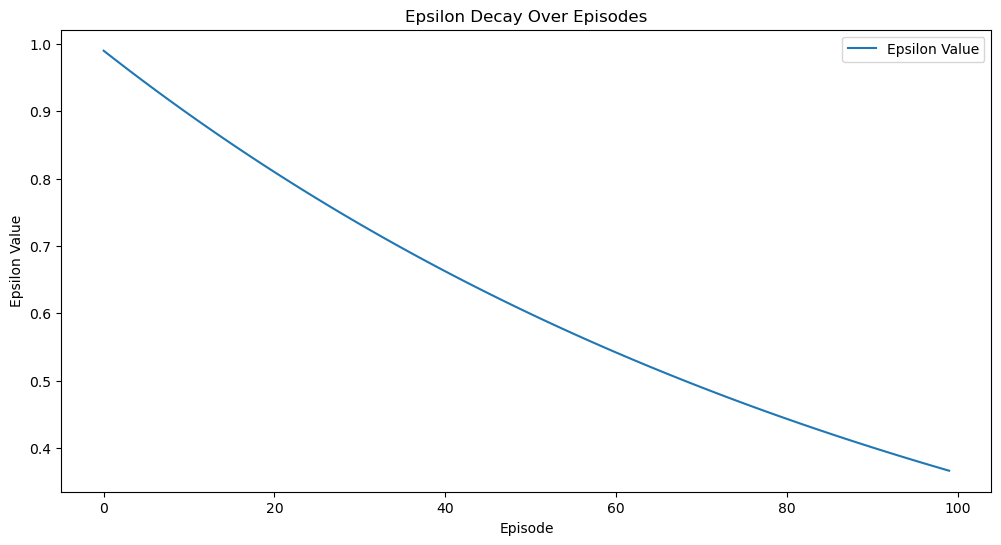

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


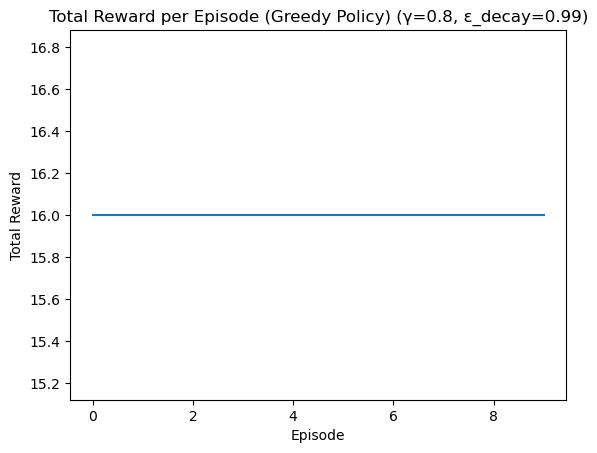

--------------------------------------------------------------------------------
Initial Q-tables for γ=0.8 and ε_decay=0.995:
Q1 Table:
Number of states in Q1-table: 0
Q2 Table:
Number of states in Q2-table: 0
Training with γ=0.8 and ε_decay=0.995...
Episode: 1, Total Reward: 4
Episode: 2, Total Reward: -44
Episode: 3, Total Reward: 3
Episode: 4, Total Reward: 1
Episode: 5, Total Reward: -2
Episode: 6, Total Reward: -9
Episode: 7, Total Reward: 11
Episode: 8, Total Reward: -50
Episode: 9, Total Reward: 0
Episode: 10, Total Reward: 4
Episode: 11, Total Reward: -46
Episode: 12, Total Reward: 9
Episode: 13, Total Reward: -21
Episode: 14, Total Reward: 13
Episode: 15, Total Reward: 10
Episode: 16, Total Reward: 12
Episode: 17, Total Reward: 9
Episode: 18, Total Reward: -6
Episode: 19, Total Reward: -5
Episode: 20, Total Reward: 7
Episode: 21, Total Reward: -16
Episode: 22, Total Reward: -2
Episode: 23, Total Reward: 8
Episode: 24, Total Reward: -7
Episode: 25, Total Reward: 5
Episode: 26,

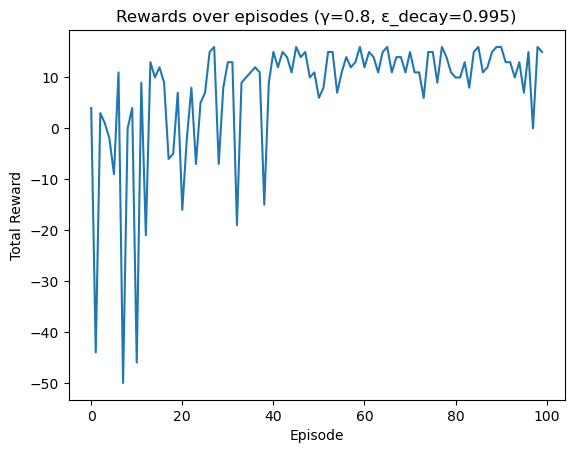

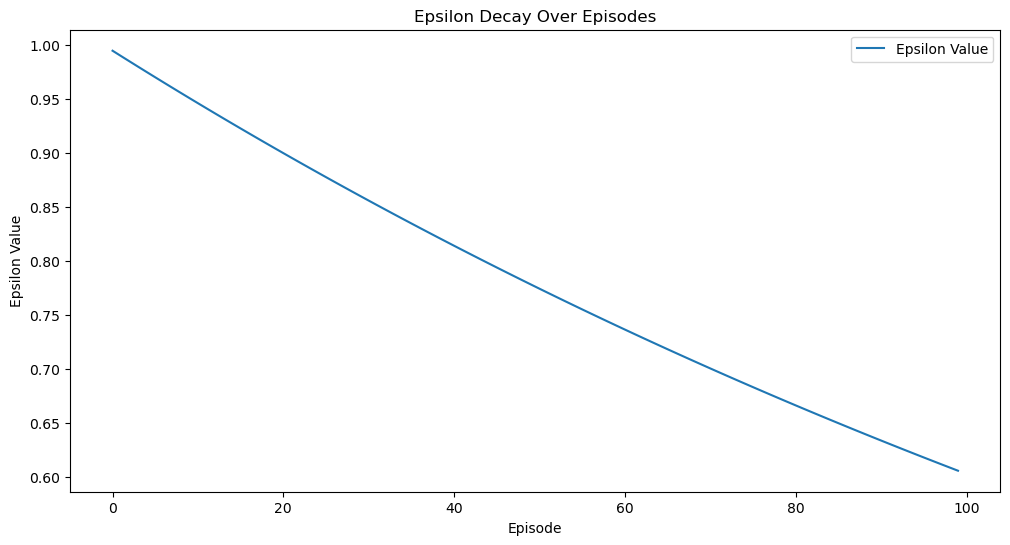

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


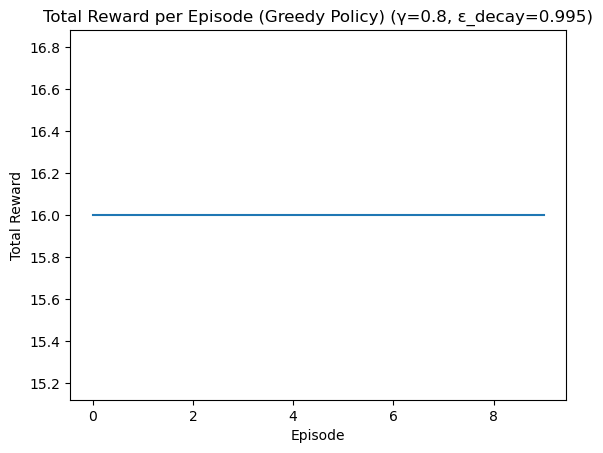

--------------------------------------------------------------------------------
Initial Q-tables for γ=0.9 and ε_decay=0.95:
Q1 Table:
Number of states in Q1-table: 0
Q2 Table:
Number of states in Q2-table: 0
Training with γ=0.9 and ε_decay=0.95...
Episode: 1, Total Reward: 8
Episode: 2, Total Reward: 11
Episode: 3, Total Reward: 4
Episode: 4, Total Reward: 4
Episode: 5, Total Reward: 9
Episode: 6, Total Reward: -17
Episode: 7, Total Reward: 14
Episode: 8, Total Reward: 2
Episode: 9, Total Reward: 13
Episode: 10, Total Reward: 12
Episode: 11, Total Reward: 16
Episode: 12, Total Reward: 12
Episode: 13, Total Reward: 16
Episode: 14, Total Reward: 15
Episode: 15, Total Reward: 15
Episode: 16, Total Reward: 15
Episode: 17, Total Reward: 14
Episode: 18, Total Reward: 17
Episode: 19, Total Reward: 16
Episode: 20, Total Reward: 16
Episode: 21, Total Reward: 15
Episode: 22, Total Reward: 15
Episode: 23, Total Reward: 14
Episode: 24, Total Reward: 16
Episode: 25, Total Reward: 15
Episode: 26, 

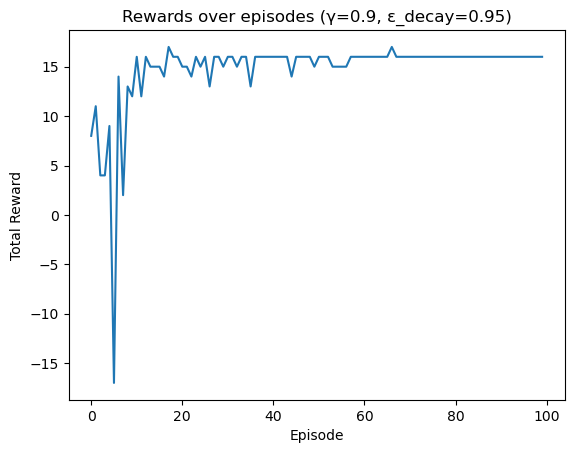

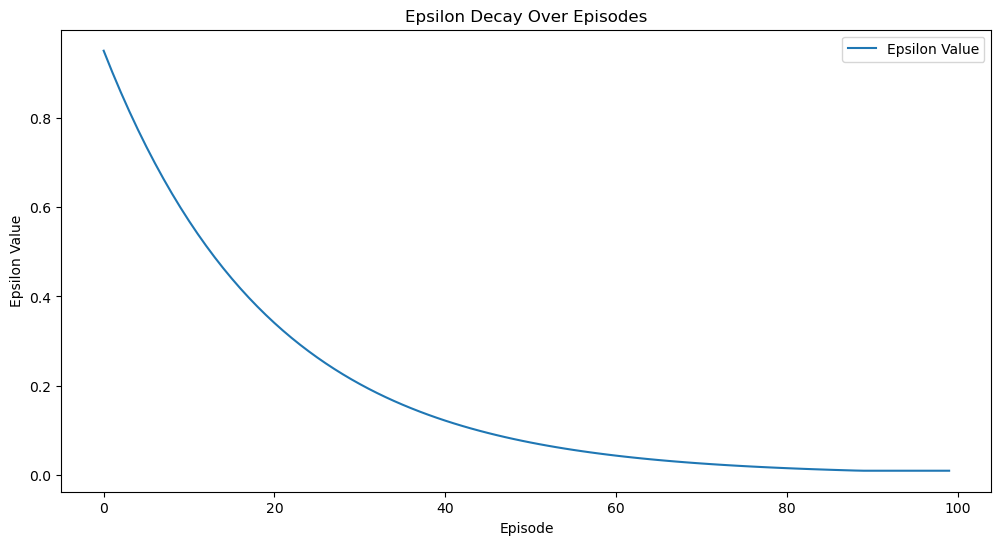

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


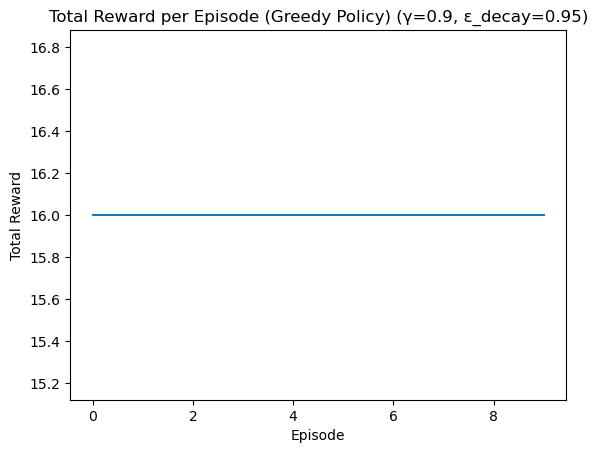

--------------------------------------------------------------------------------
Initial Q-tables for γ=0.9 and ε_decay=0.99:
Q1 Table:
Number of states in Q1-table: 0
Q2 Table:
Number of states in Q2-table: 0
Training with γ=0.9 and ε_decay=0.99...
Episode: 1, Total Reward: -44
Episode: 2, Total Reward: 11
Episode: 3, Total Reward: 4
Episode: 4, Total Reward: 4
Episode: 5, Total Reward: -5
Episode: 6, Total Reward: 3
Episode: 7, Total Reward: 1
Episode: 8, Total Reward: -12
Episode: 9, Total Reward: 2
Episode: 10, Total Reward: -13
Episode: 11, Total Reward: 16
Episode: 12, Total Reward: 14
Episode: 13, Total Reward: -22
Episode: 14, Total Reward: 8
Episode: 15, Total Reward: 7
Episode: 16, Total Reward: 10
Episode: 17, Total Reward: 10
Episode: 18, Total Reward: 7
Episode: 19, Total Reward: -11
Episode: 20, Total Reward: -1
Episode: 21, Total Reward: 14
Episode: 22, Total Reward: 2
Episode: 23, Total Reward: 16
Episode: 24, Total Reward: 13
Episode: 25, Total Reward: -6
Episode: 26, 

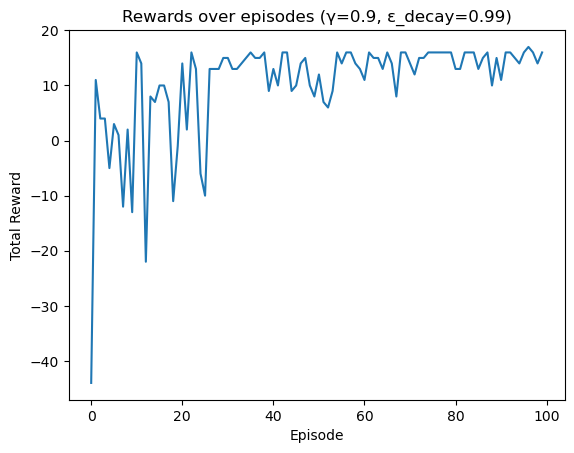

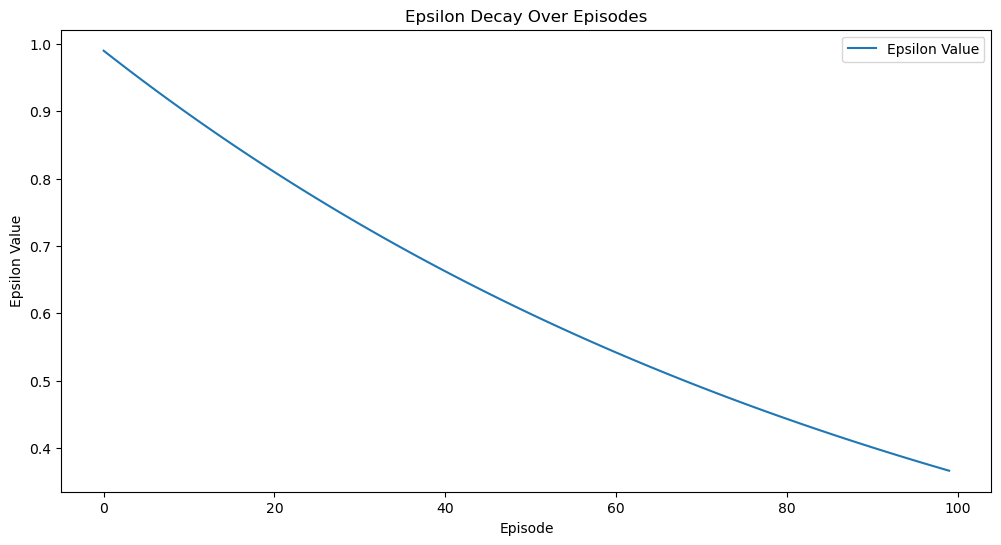

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


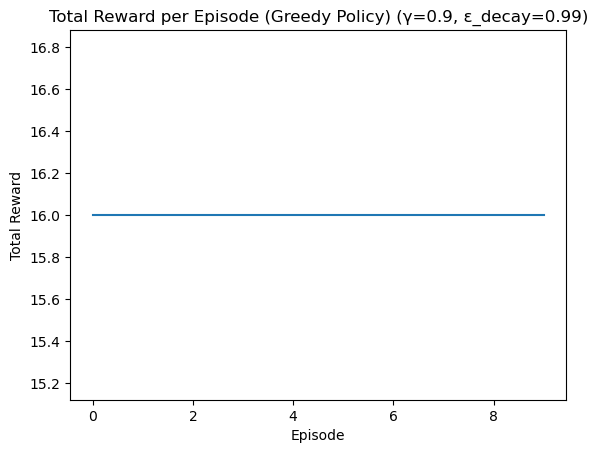

--------------------------------------------------------------------------------
Initial Q-tables for γ=0.9 and ε_decay=0.995:
Q1 Table:
Number of states in Q1-table: 0
Q2 Table:
Number of states in Q2-table: 0
Training with γ=0.9 and ε_decay=0.995...
Episode: 1, Total Reward: -14
Episode: 2, Total Reward: 11
Episode: 3, Total Reward: -4
Episode: 4, Total Reward: -1
Episode: 5, Total Reward: -32
Episode: 6, Total Reward: 12
Episode: 7, Total Reward: -8
Episode: 8, Total Reward: 2
Episode: 9, Total Reward: -11
Episode: 10, Total Reward: 5
Episode: 11, Total Reward: 13
Episode: 12, Total Reward: 1
Episode: 13, Total Reward: 3
Episode: 14, Total Reward: 12
Episode: 15, Total Reward: 12
Episode: 16, Total Reward: 7
Episode: 17, Total Reward: 12
Episode: 18, Total Reward: 1
Episode: 19, Total Reward: -4
Episode: 20, Total Reward: 11
Episode: 21, Total Reward: 7
Episode: 22, Total Reward: 9
Episode: 23, Total Reward: 2
Episode: 24, Total Reward: 0
Episode: 25, Total Reward: 12
Episode: 26, T

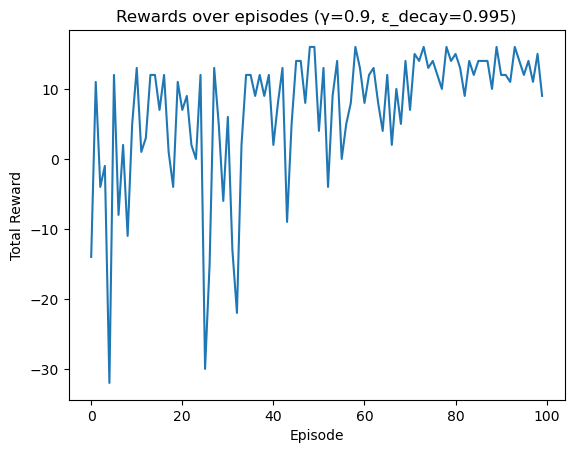

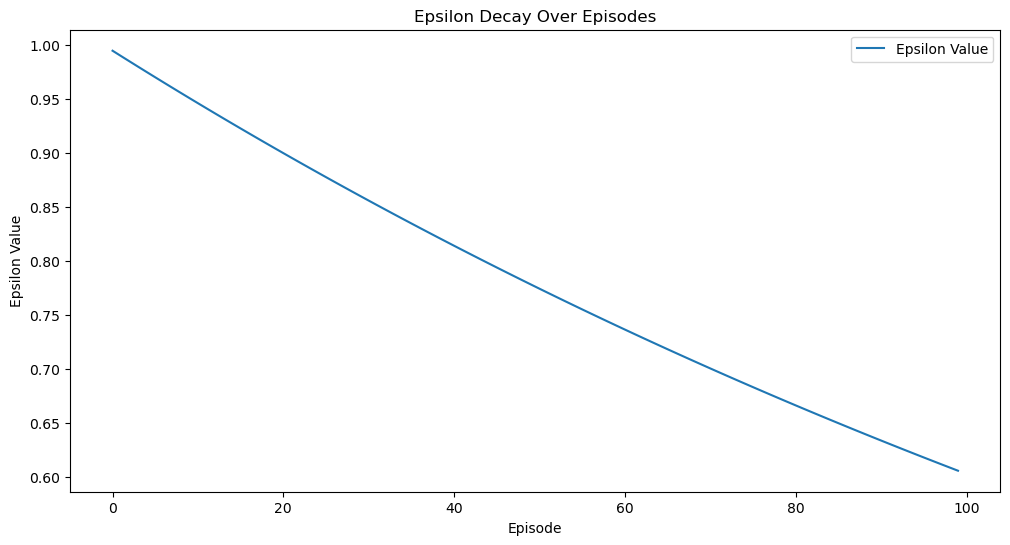

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


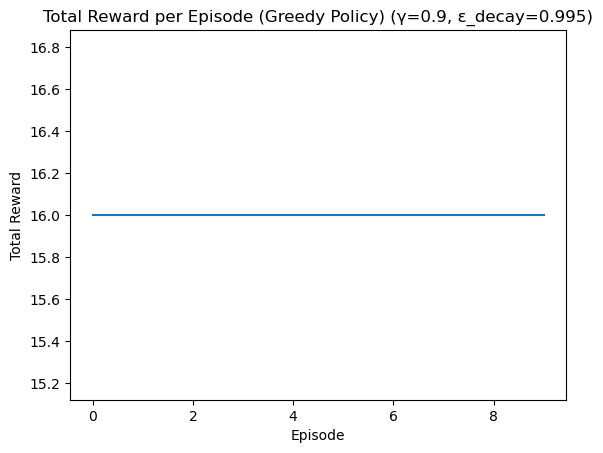

--------------------------------------------------------------------------------
Initial Q-tables for γ=0.99 and ε_decay=0.95:
Q1 Table:
Number of states in Q1-table: 0
Q2 Table:
Number of states in Q2-table: 0
Training with γ=0.99 and ε_decay=0.95...
Episode: 1, Total Reward: 0
Episode: 2, Total Reward: 15
Episode: 3, Total Reward: -23
Episode: 4, Total Reward: 9
Episode: 5, Total Reward: -1
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 9
Episode: 8, Total Reward: 15
Episode: 9, Total Reward: 3
Episode: 10, Total Reward: 16
Episode: 11, Total Reward: 12
Episode: 12, Total Reward: 15
Episode: 13, Total Reward: 12
Episode: 14, Total Reward: 16
Episode: 15, Total Reward: 17
Episode: 16, Total Reward: 16
Episode: 17, Total Reward: 16
Episode: 18, Total Reward: 16
Episode: 19, Total Reward: 17
Episode: 20, Total Reward: 15
Episode: 21, Total Reward: 14
Episode: 22, Total Reward: 16
Episode: 23, Total Reward: 16
Episode: 24, Total Reward: 13
Episode: 25, Total Reward: 16
Episode: 2

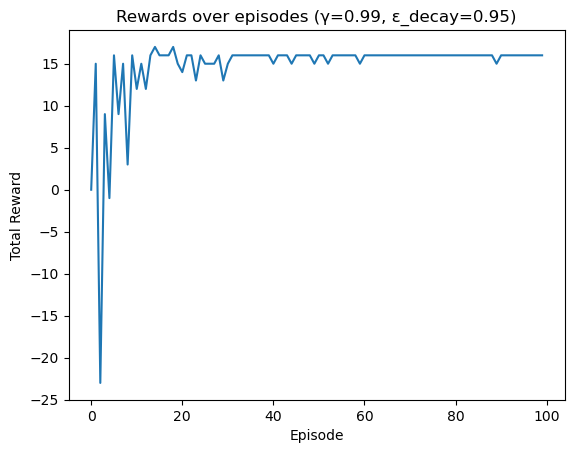

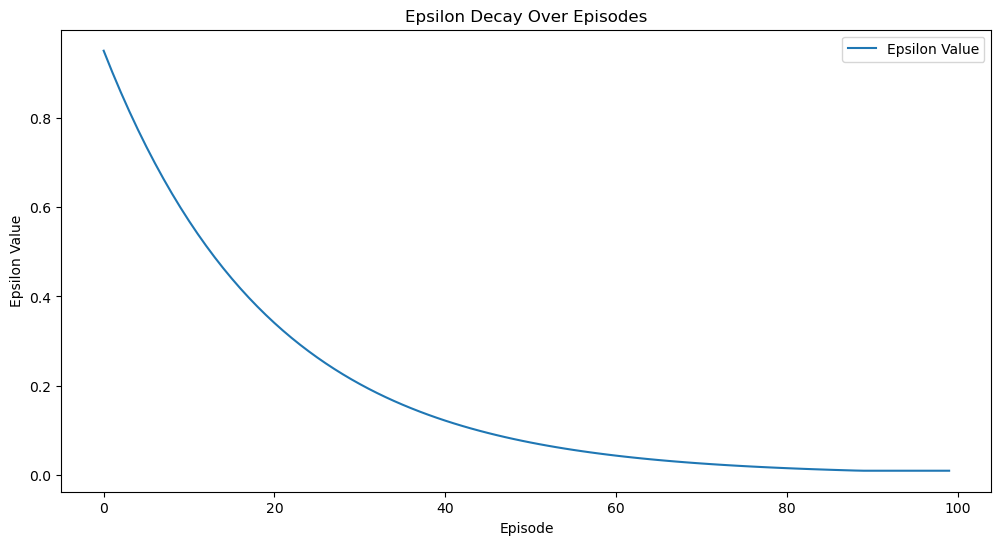

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


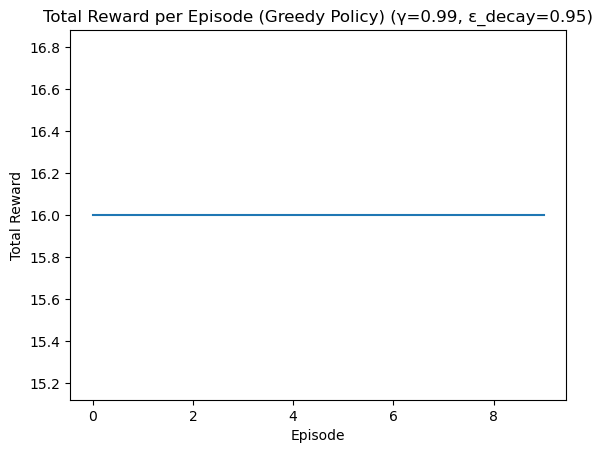

--------------------------------------------------------------------------------
Initial Q-tables for γ=0.99 and ε_decay=0.99:
Q1 Table:
Number of states in Q1-table: 0
Q2 Table:
Number of states in Q2-table: 0
Training with γ=0.99 and ε_decay=0.99...
Episode: 1, Total Reward: 8
Episode: 2, Total Reward: 11
Episode: 3, Total Reward: -2
Episode: 4, Total Reward: -28
Episode: 5, Total Reward: 7
Episode: 6, Total Reward: -45
Episode: 7, Total Reward: 2
Episode: 8, Total Reward: 15
Episode: 9, Total Reward: 3
Episode: 10, Total Reward: -3
Episode: 11, Total Reward: 11
Episode: 12, Total Reward: 10
Episode: 13, Total Reward: 10
Episode: 14, Total Reward: 14
Episode: 15, Total Reward: 11
Episode: 16, Total Reward: 16
Episode: 17, Total Reward: 7
Episode: 18, Total Reward: 12
Episode: 19, Total Reward: 6
Episode: 20, Total Reward: 2
Episode: 21, Total Reward: 11
Episode: 22, Total Reward: 10
Episode: 23, Total Reward: 8
Episode: 24, Total Reward: 8
Episode: 25, Total Reward: 11
Episode: 26, T

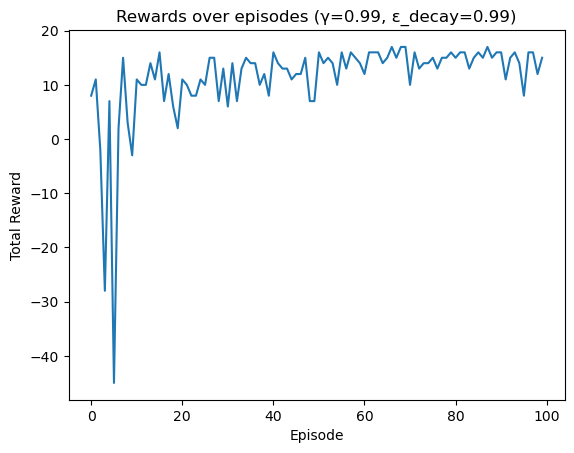

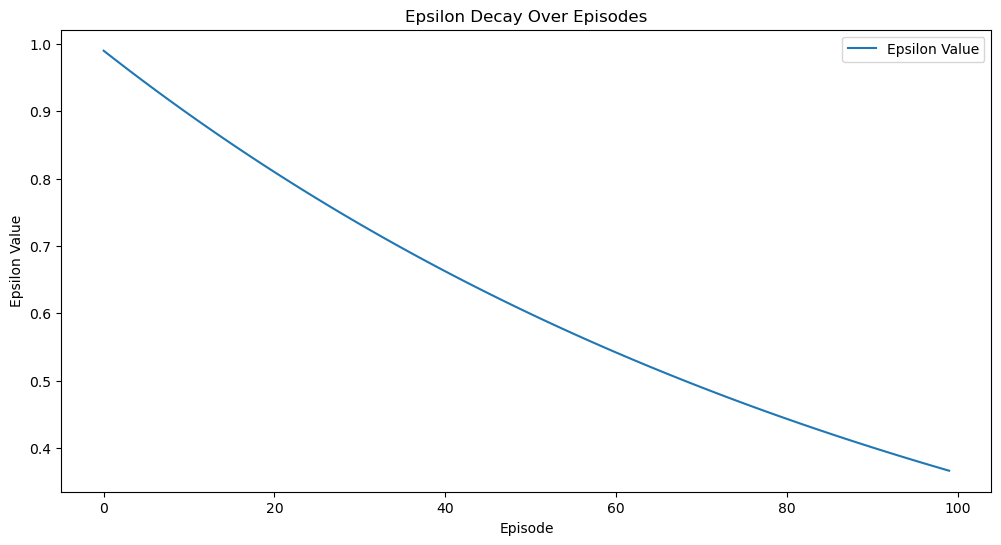

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


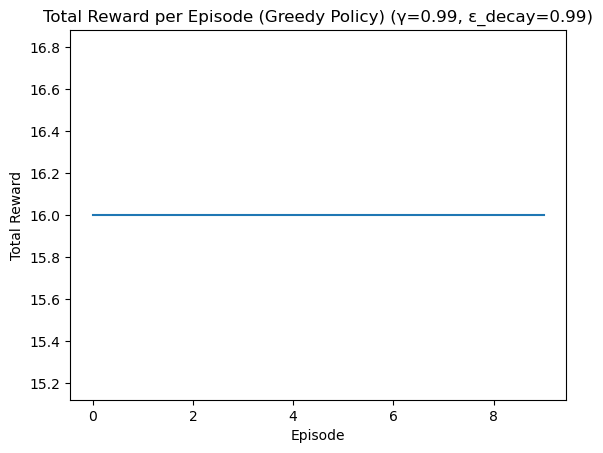

--------------------------------------------------------------------------------
Initial Q-tables for γ=0.99 and ε_decay=0.995:
Q1 Table:
Number of states in Q1-table: 0
Q2 Table:
Number of states in Q2-table: 0
Training with γ=0.99 and ε_decay=0.995...
Episode: 1, Total Reward: 2
Episode: 2, Total Reward: -14
Episode: 3, Total Reward: 7
Episode: 4, Total Reward: 0
Episode: 5, Total Reward: -34
Episode: 6, Total Reward: -49
Episode: 7, Total Reward: 8
Episode: 8, Total Reward: 12
Episode: 9, Total Reward: 14
Episode: 10, Total Reward: 13
Episode: 11, Total Reward: 12
Episode: 12, Total Reward: 16
Episode: 13, Total Reward: -14
Episode: 14, Total Reward: -29
Episode: 15, Total Reward: 12
Episode: 16, Total Reward: 15
Episode: 17, Total Reward: 12
Episode: 18, Total Reward: 12
Episode: 19, Total Reward: 14
Episode: 20, Total Reward: 13
Episode: 21, Total Reward: 10
Episode: 22, Total Reward: 1
Episode: 23, Total Reward: 4
Episode: 24, Total Reward: 1
Episode: 25, Total Reward: 13
Episode

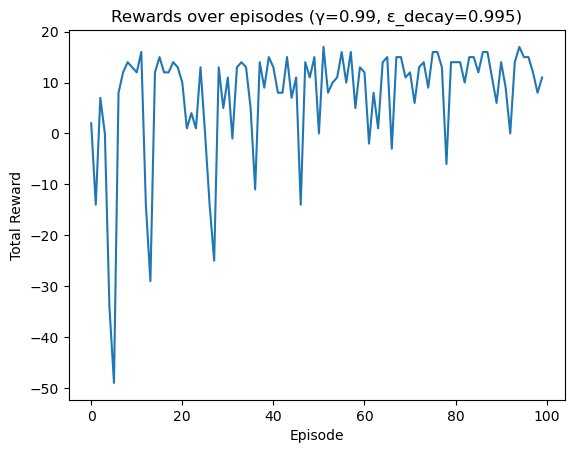

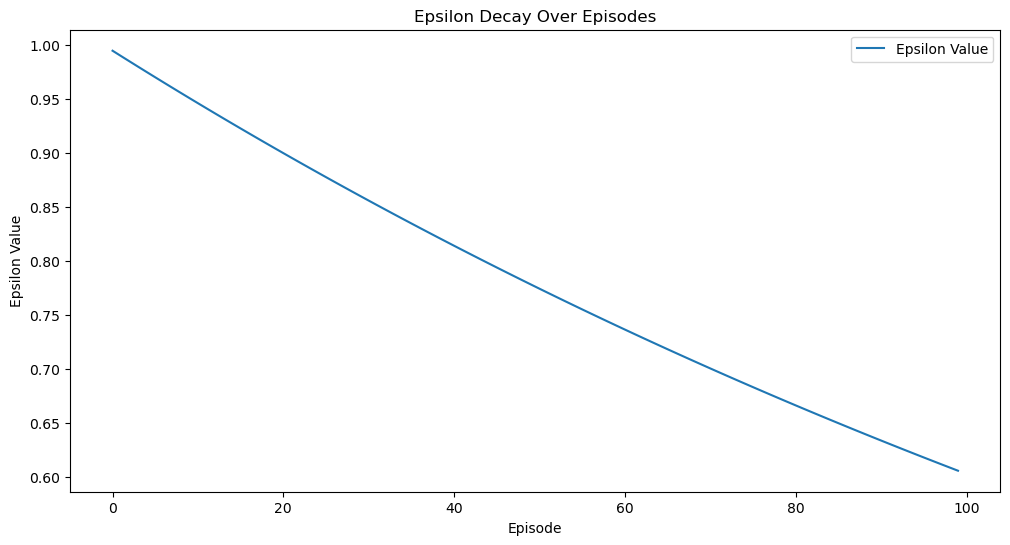

Episode: 1, Total Reward: 16
Episode: 2, Total Reward: 16
Episode: 3, Total Reward: 16
Episode: 4, Total Reward: 16
Episode: 5, Total Reward: 16
Episode: 6, Total Reward: 16
Episode: 7, Total Reward: 16
Episode: 8, Total Reward: 16
Episode: 9, Total Reward: 16
Episode: 10, Total Reward: 16


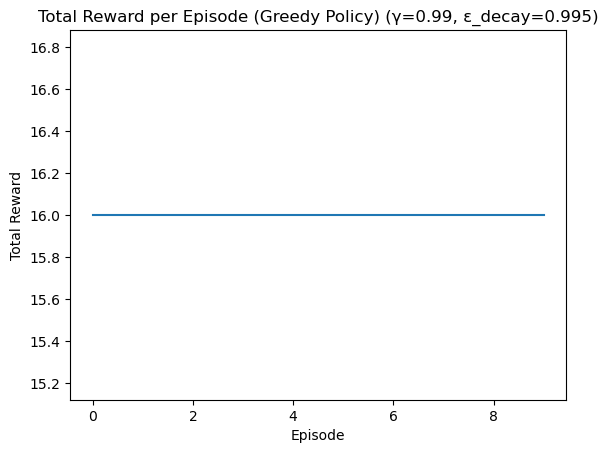

--------------------------------------------------------------------------------
The best greedy parameters were γ=0.8 and ε_decay=0.95 with an average greedy reward of 16.0


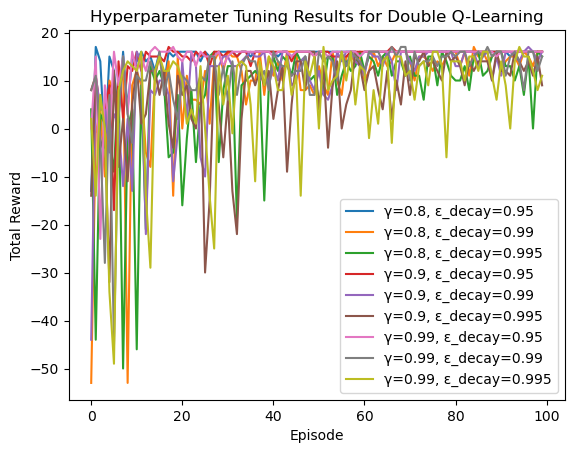

In [14]:


# Define the hyperparameter grid
gamma_values = [0.8, 0.9, 0.99]
epsilon_decay_values = [0.95, 0.99, 0.995]

# Store the results
tuning_results = {}
greedy_results = {}

# Best parameter initialization
best_params = None
best_avg_reward = -np.inf
best_avg_greedy_reward = -np.inf

# Nested loops for hyperparameter grid search
for gamma in gamma_values:
    for epsilon_decay in epsilon_decay_values:
        # Initialize the Double Q-learning agent
        agent = DoubleQLearningAgent(alpha, gamma, epsilon, epsilon_decay, min_epsilon, action_space, state_space)
        
        # Print the initial Q-tables
        print(f"Initial Q-tables for γ={gamma} and ε_decay={epsilon_decay}:")
        print("Q1 Table:")
        print(f"Number of states in Q1-table: {len(agent.Q1)}")
        print("Q2 Table:")
        print(f"Number of states in Q2-table: {len(agent.Q2)}")
        
        # Train the agent
        print(f"Training with γ={gamma} and ε_decay={epsilon_decay}...")
        rewards = agent.train(env, 100, max_steps)
        
        # Print the final Q-tables
        print("Final Q-tables:")
        print("Q1 Table:")
        print_q_table(agent.Q1,"Q1")
        print("Q2 Table:")
        print_q_table(agent.Q2,"Q2")
        
        # Store the results
        tuning_results[(gamma, epsilon_decay)] = rewards

        # Calculate the average reward
        avg_reward = np.mean(rewards[-10:])
        if avg_reward > best_avg_reward:
            best_avg_reward = avg_reward
            best_params = (gamma, epsilon_decay)

        print(f"Completed γ={gamma}, ε_decay={epsilon_decay}. Average Reward: {avg_reward}\n")
        
        # Plot the rewards
        plt.plot(rewards)
        plt.title(f'Rewards over episodes (γ={gamma}, ε_decay={epsilon_decay})')
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.show()
        
        plt.figure(figsize=(12, 6))
        plt.plot(agent.epsilon_history, label='Epsilon Value')
        plt.xlabel('Episode')
        plt.ylabel('Epsilon Value')
        plt.title('Epsilon Decay Over Episodes')
        plt.legend()
        plt.show()
        
        # Run greedy policy
        num_episodes = 10
        greedy_rewards = run_greedy_policy(env, agent, num_episodes)
        greedy_results[(gamma, epsilon_decay)] = np.mean(greedy_rewards)
        
        avg_greedy_reward = np.mean(greedy_rewards)
        if avg_greedy_reward > best_avg_greedy_reward:
            best_avg_greedy_reward = avg_greedy_reward
            best_params_greedy = (gamma, epsilon_decay)
            
        
        plt.plot(greedy_rewards)
        plt.title(f'Total Reward per Episode (Greedy Policy) (γ={gamma}, ε_decay={epsilon_decay})')
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.show()
        
        print("--------------------------------------------------------------------------------")

# Print the best parameters
print(f"The best greedy parameters were γ={best_params_greedy[0]} and ε_decay={best_params_greedy[1]} with an average greedy reward of {best_avg_greedy_reward}")



# Plot hyperparameter tuning results
for params, rewards in tuning_results.items():
    plt.plot(rewards, label=f"γ={params[0]}, ε_decay={params[1]}")

plt.title('Hyperparameter Tuning Results for Double Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.show()


## Bonus : 2-Step SARSA

In [15]:
class TwoStepSARSAAgent:
    def __init__(self, alpha, gamma, epsilon, epsilon_decay, min_epsilon, action_space, state_space):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.action_space = action_space
        self.state_space = state_space
        self.q_table = defaultdict(lambda: np.zeros(action_space.n))
        self.epsilon_history = []

    def choose_action(self, state):
        state_tuple = tuple(state)  # Convert state to a tuple
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.action_space.n)
        else:
            q_vals = self.q_table[state_tuple]
            action = np.argmax(q_vals)
            return action


    def update(self, state, action, reward, next_state, next_action, next_next_state, next_next_action, done):
        state_tuple = tuple(state)
        next_state_tuple = tuple(next_state)
        next_next_state_tuple = tuple(next_next_state)

        # Calculate the 2-step target
        if not done:
            two_step_target = reward + self.gamma * self.q_table[next_state_tuple][next_action] +  self.gamma ** 2 * self.q_table[next_next_state_tuple][next_next_action]
                             
        else:
            two_step_target = reward  

        # Update the Q-value
        self.q_table[state_tuple][action] += self.alpha * (two_step_target - self.q_table[state_tuple][action])


    def train(self, env, num_episodes, max_steps):
        rewards = []
        for episode in range(num_episodes):
            state = env.reset()
            action = self.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            next_action = self.choose_action(next_state)
            total_reward = reward

            for step in range(1, max_steps):
                next_next_state, next_reward, done, _ = env.step(next_action)
                next_next_action = self.choose_action(next_next_state)

                self.update(state, action, reward, next_state, next_action, next_next_state, next_next_action, done)

                state, action, reward = next_state, next_action, next_reward
                next_state, next_action = next_next_state, next_next_action

                total_reward += reward

                if done:
                    break

            rewards.append(total_reward)
            self.epsilon = max(self.epsilon * self.epsilon_decay, self.min_epsilon)
            self.epsilon_history.append(self.epsilon)
            print(f"Episode: {episode+1}, Total Reward: {total_reward}")

        return rewards





Initial Q-table:
Number of states in Q-table: 0
Episode: 1, Total Reward: 12
Episode: 2, Total Reward: 14
Episode: 3, Total Reward: 1
Episode: 4, Total Reward: 15
Episode: 5, Total Reward: -10
Episode: 6, Total Reward: 9
Episode: 7, Total Reward: -3
Episode: 8, Total Reward: 9
Episode: 9, Total Reward: 2
Episode: 10, Total Reward: -7
Episode: 11, Total Reward: 7
Episode: 12, Total Reward: 12
Episode: 13, Total Reward: 3
Episode: 14, Total Reward: 8
Episode: 15, Total Reward: 13
Episode: 16, Total Reward: 14
Episode: 17, Total Reward: 13
Episode: 18, Total Reward: 15
Episode: 19, Total Reward: 13
Episode: 20, Total Reward: 12
Episode: 21, Total Reward: 13
Episode: 22, Total Reward: 16
Episode: 23, Total Reward: 13
Episode: 24, Total Reward: 4
Episode: 25, Total Reward: -4
Episode: 26, Total Reward: 5
Episode: 27, Total Reward: 11
Episode: 28, Total Reward: 10
Episode: 29, Total Reward: 15
Episode: 30, Total Reward: 16
Episode: 31, Total Reward: 7
Episode: 32, Total Reward: 8
Episode: 33

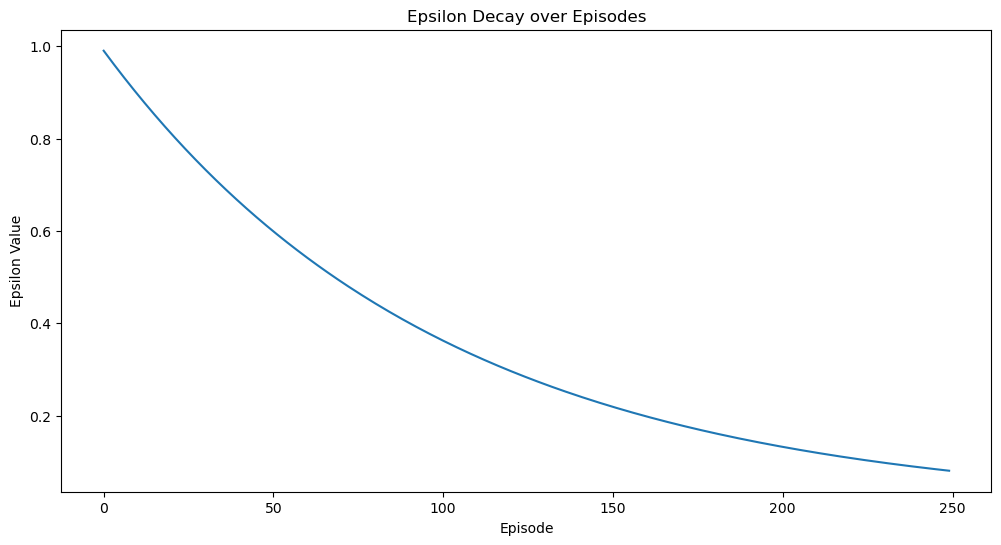

Final Q-Table:
State: (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2) Action 0: 4.65 | Action 1: 4178.25 | Action 2: 27347.95 | Action 3: 262.92
State: (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2) Action 0: 24.72 | Action 1: 76626.36 | Action 2: 2.25 | Action 3: 5.24
State: (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2) Action 0: 3.07 | Action 1: 5972.95 | Action 2: 539137.07 | Action 3: 2.31
State: (0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2) Action 0: 1.23 | Action 1: 1406124.72 | Action 2: 1.32 | Action 3: 1.68
State: (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2) Action 0: 25.86 | Action 1: 0.83 | Action 2: 74.30 | Action 3: 220931.60
State: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2) Action 0: -0.45 | Action 1: 0.00 | Action 2: -1.10 | Action 3: -0.42
State: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2) Action 0: 188593.69 | Action 1: 0.95 | Action 2: 0.80 | Action 3: 4721813.08
State: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2) Action 0: -0.40 | Action 1

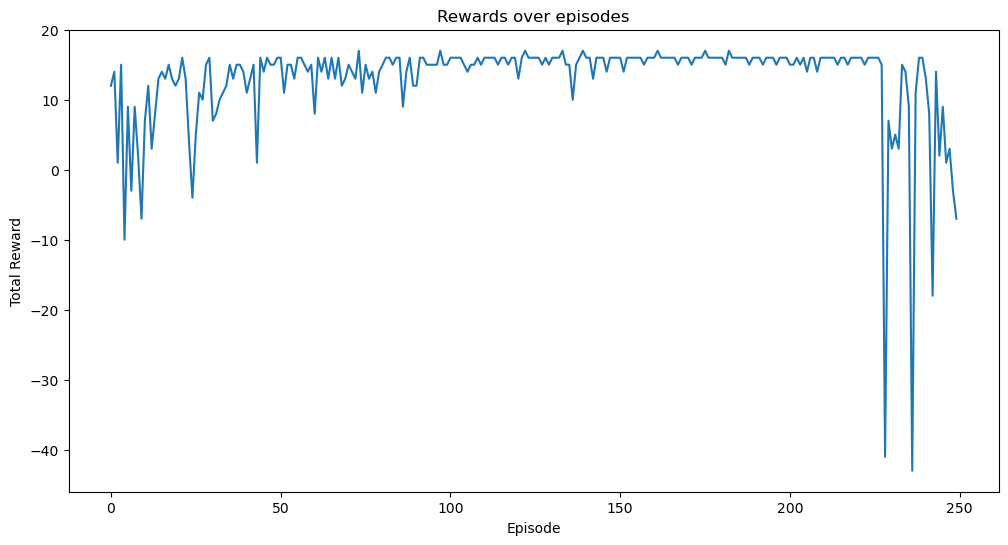

In [16]:
# Parameters for SARSA
alpha = 0.1
gamma = 0.9
epsilon = 1.0
epsilon_decay = 0.99
min_epsilon = 0.01
num_episodes = 250
max_steps = 100

# Initialize the environment and the agent
env = SearchRescueEnv()
action_space = env.action_space
state_space = env.observation_space
two_step_agent = TwoStepSARSAAgent(alpha, gamma, epsilon, epsilon_decay, min_epsilon, action_space, state_space)

def print_q_table(q_table):
    for state, action_values in q_table.items():
        state_str = f"State: {state}"
        action_str = " | ".join([f"Action {i}: {val:.2f}" for i, val in enumerate(action_values)])
        print(state_str, action_str)

# Print the initial Q-table
# Print the initial Q-table
print("Initial Q-table:")
print(f"Number of states in Q-table: {len(two_step_agent.q_table)}")


# Train the agent
rewards = two_step_agent.train(env, num_episodes, max_steps)

plt.figure(figsize=(12, 6))
plt.plot(two_step_agent.epsilon_history)
plt.title('Epsilon Decay over Episodes')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.show()

print("Final Q-Table:")
print_q_table(two_step_agent.q_table)

# Plot the rewards
plt.figure(figsize=(12, 6))
plt.plot(rewards)
plt.title('Rewards over episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()